In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
%matplotlib inline

In [3]:
df = pd.read_csv('MY2022 Fuel Consumption Ratings.csv')

In [4]:
df.head()

Model Year   Make              Model Vehicle Class  Engine Size(L)  \
0        2022  Acura                ILX       Compact             2.4   
1        2022  Acura         MDX SH-AWD    SUV: Small             3.5   
2        2022  Acura         RDX SH-AWD    SUV: Small             2.0   
3        2022  Acura  RDX SH-AWD A-SPEC    SUV: Small             2.0   
4        2022  Acura         TLX SH-AWD       Compact             2.0   

   Cylinders Transmission Fuel Type  Fuel Consumption (City (L/100 km)  \
0          4          AM8         Z                                9.9   
1          6         AS10         Z                               12.6   
2          4         AS10         Z                               11.0   
3          4         AS10         Z                               11.3   
4          4         AS10         Z                               11.2   

   Fuel Consumption(Hwy (L/100 km))  Fuel Consumption(Comb (L/100 km))  \
0                               7.0                                8.6   
1                               9.4                               11.2   
2                               8.6                                9.9   
3                               9.1                               10.3   
4                               8.0                                9.8   

   Fuel Consumption(Comb (mpg))  CO2 Emissions(g/km)  CO2 Rating  Smog Rating  
0                            33                  200           6            3  
1                            25                  263           4            5  
2                            29                  232           5            6  
3                            27                  242           5            6  
4                            29                  230           5            7

In [5]:
df.tail()

Model Year   Make        Model  Vehicle Class  Engine Size(L)  Cylinders  \
941        2022  Volvo  XC40 T5 AWD     SUV: Small             2.0          4   
942        2022  Volvo  XC60 B5 AWD     SUV: Small             2.0          4   
943        2022  Volvo  XC60 B6 AWD     SUV: Small             2.0          4   
944        2022  Volvo  XC90 T5 AWD  SUV: Standard             2.0          4   
945        2022  Volvo  XC90 T6 AWD  SUV: Standard             2.0          4   

    Transmission Fuel Type  Fuel Consumption (City (L/100 km)  \
941          AS8         Z                               10.7   
942          AS8         Z                               10.5   
943          AS8         Z                               11.0   
944          AS8         Z                               11.5   
945          AS8         Z                               12.4   

     Fuel Consumption(Hwy (L/100 km))  Fuel Consumption(Comb (L/100 km))  \
941                               7.7                                9.4   
942                               8.1                                9.4   
943                               8.7                                9.9   
944                               8.4                               10.1   
945                               8.9                               10.8   

     Fuel Consumption(Comb (mpg))  CO2 Emissions(g/km)  CO2 Rating  \
941                            30                  219           5   
942                            30                  219           5   
943                            29                  232           5   
944                            28                  236           5   
945                            26                  252           5   

     Smog Rating  
941            5  
942            5  
943            7  
944            5  
945            7

In [6]:
df.shape

(946, 15)

In [7]:
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [10]:
df.describe()

Model Year  Engine Size(L)   Cylinders  \
count       946.0      946.000000  946.000000   
mean       2022.0        3.198732    5.668076   
std           0.0        1.374814    1.932670   
min        2022.0        1.200000    3.000000   
25%        2022.0        2.000000    4.000000   
50%        2022.0        3.000000    6.000000   
75%        2022.0        3.800000    6.000000   
max        2022.0        8.000000   16.000000   

       Fuel Consumption (City (L/100 km)  Fuel Consumption(Hwy (L/100 km))  \
count                         946.000000                        946.000000   
mean                           12.506448                          9.363319   
std                             3.452043                          2.285125   
min                             4.000000                          3.900000   
25%                            10.200000                          7.700000   
50%                            12.200000                          9.200000   
75%                            14.700000                         10.700000   
max                            30.300000                         20.900000   

       Fuel Consumption(Comb (L/100 km))  Fuel Consumption(Comb (mpg))  \
count                         946.000000                    946.000000   
mean                           11.092072                     27.247357   
std                             2.876276                      7.685217   
min                             4.000000                     11.000000   
25%                             9.100000                     22.000000   
50%                            10.800000                     26.000000   
75%                            12.900000                     31.000000   
max                            26.100000                     71.000000   

       CO2 Emissions(g/km)  CO2 Rating  Smog Rating  
count           946.000000  946.000000   946.000000  
mean            259.172304    4.539112     4.950317  
std              64.443149    1.471799     1.679842  
min              94.000000    1.000000     1.000000  
25%             213.250000    3.000000     3.000000  
50%             257.000000    5.000000     5.000000  
75%             300.750000    5.000000     6.000000  
max             608.000000   10.000000     7.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [12]:
df.nunique()

Model Year                             1
Make                                  39
Model                                715
Vehicle Class                         14
Engine Size(L)                        36
Cylinders                              8
Transmission                          23
Fuel Type                              4
Fuel Consumption (City (L/100 km)    149
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Comb (mpg))          49
CO2 Emissions(g/km)                  242
CO2 Rating                            10
Smog Rating                            5
dtype: int64

In [13]:
data_cat = df[['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating']]

In [14]:
for i in data_cat.columns:
    print(data_cat[i].unique())

[2022]
['Acura' 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bentley' 'BMW' 'Bugatti'
 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ford' 'Genesis'
 'GMC' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia' 'Lamborghini'
 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda' 'Mercedes-Benz' 'MINI'
 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce' 'Subaru' 'Toyota'
 'Volkswagen' 'Volvo']
['ILX' 'MDX SH-AWD' 'RDX SH-AWD' 'RDX SH-AWD A-SPEC' 'TLX SH-AWD'
 'TLX SH-AWD A-SPEC' 'TLX Type S' 'TLX Type S (Performance Tire)' 'Giulia'
 'Giulia AWD' 'Giulia Quadrifoglio' 'Stelvio' 'Stelvio AWD'
 'Stelvio AWD Quadrifoglio' 'DB11 V8' 'DB11 V12' 'DBS V12' 'DBX V8'
 'Vantage V8' 'A3 Sedan 40 TFSI quattro' 'A4 Sedan 40 TFSI quattro'
 'A4 Sedan 45 TFSI quattro' 'A4 allroad 45 TFSI quattro'
 'A5 Cabriolet 45 TFSI quattro' 'A5 Coupe 45 TFSI quattro'
 'A5 Sportback 45 TFSI quattro' 'A6 Sedan 45 TFSI quattro'
 'A6 Sedan 55 TFSI quattro' 'A6 allroad 55 TFSI quattro'
 'A7 Sportback 55 TFSI quattro' 'A8 L S

In [15]:
for i in data_cat.columns:
    print(data_cat[i].value_counts())

2022    946
Name: Model Year, dtype: int64
Ford             89
Chevrolet        80
Porsche          77
BMW              60
GMC              54
Toyota           51
Audi             45
Mercedes-Benz    43
Jeep             34
Hyundai          29
Lexus            28
Cadillac         26
Kia              25
Honda            23
Mazda            23
Nissan           23
Dodge            21
MINI             20
Subaru           19
Land Rover       18
Volkswagen       18
Ram              16
Maserati         13
Volvo            12
Buick             9
Bentley           8
Genesis           8
Jaguar            8
Acura             8
Infiniti          8
Lamborghini       8
Lincoln           7
Rolls-Royce       7
Mitsubishi        7
Alfa Romeo        6
Chrysler          6
Aston Martin      5
Bugatti           3
FIAT              1
Name: Make, dtype: int64
Mustang                           5
Sierra 4WD Mud Terrain Tire       5
Silverado 4WD Mud Terrain Tire    5
Sierra 4WD                        5
Silverad

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\

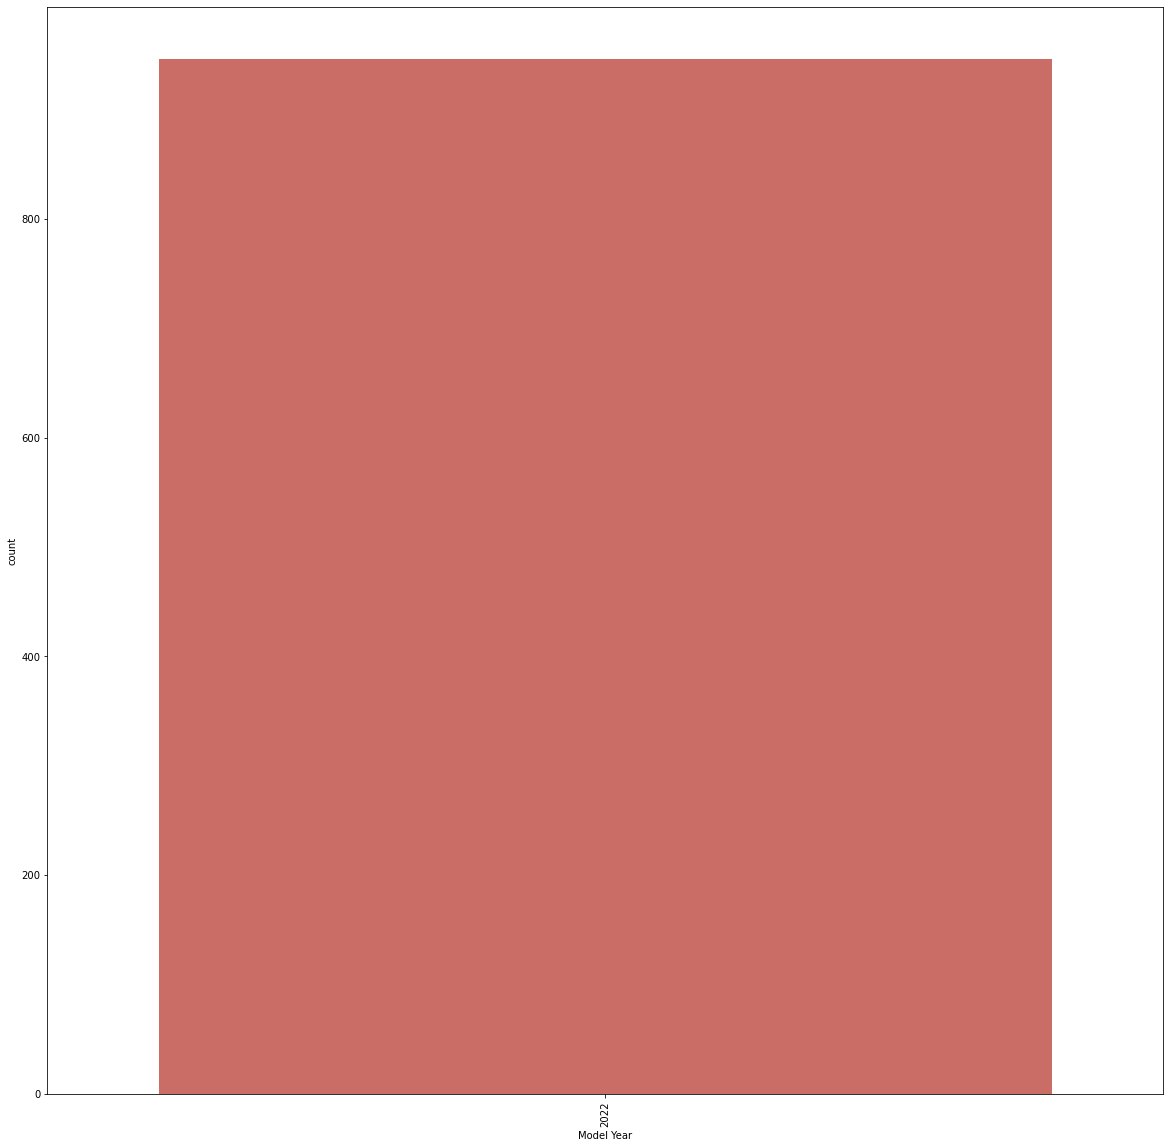

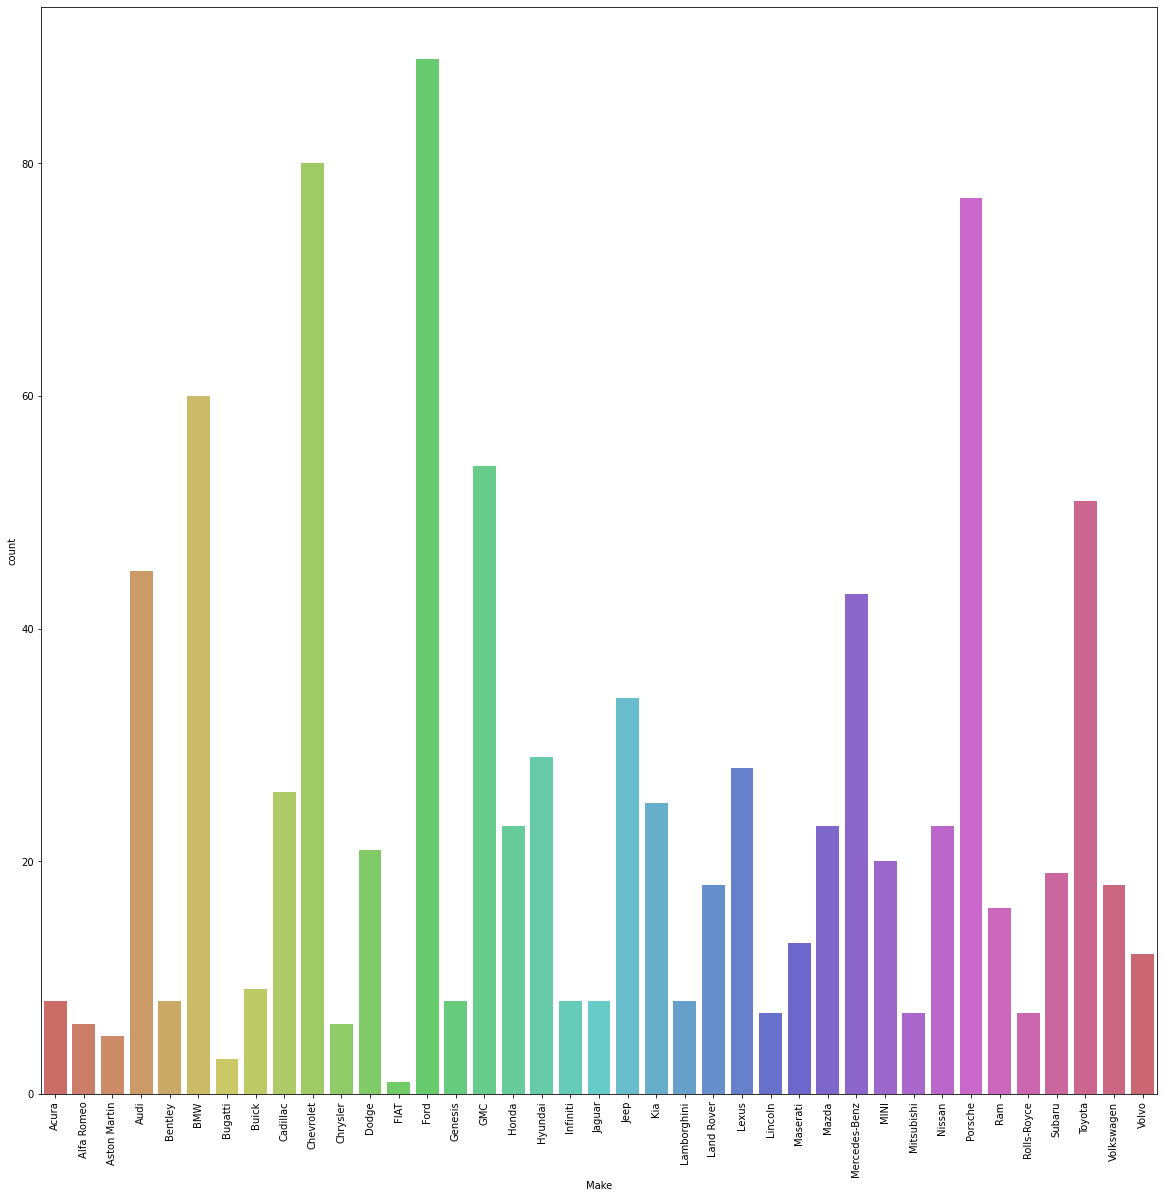

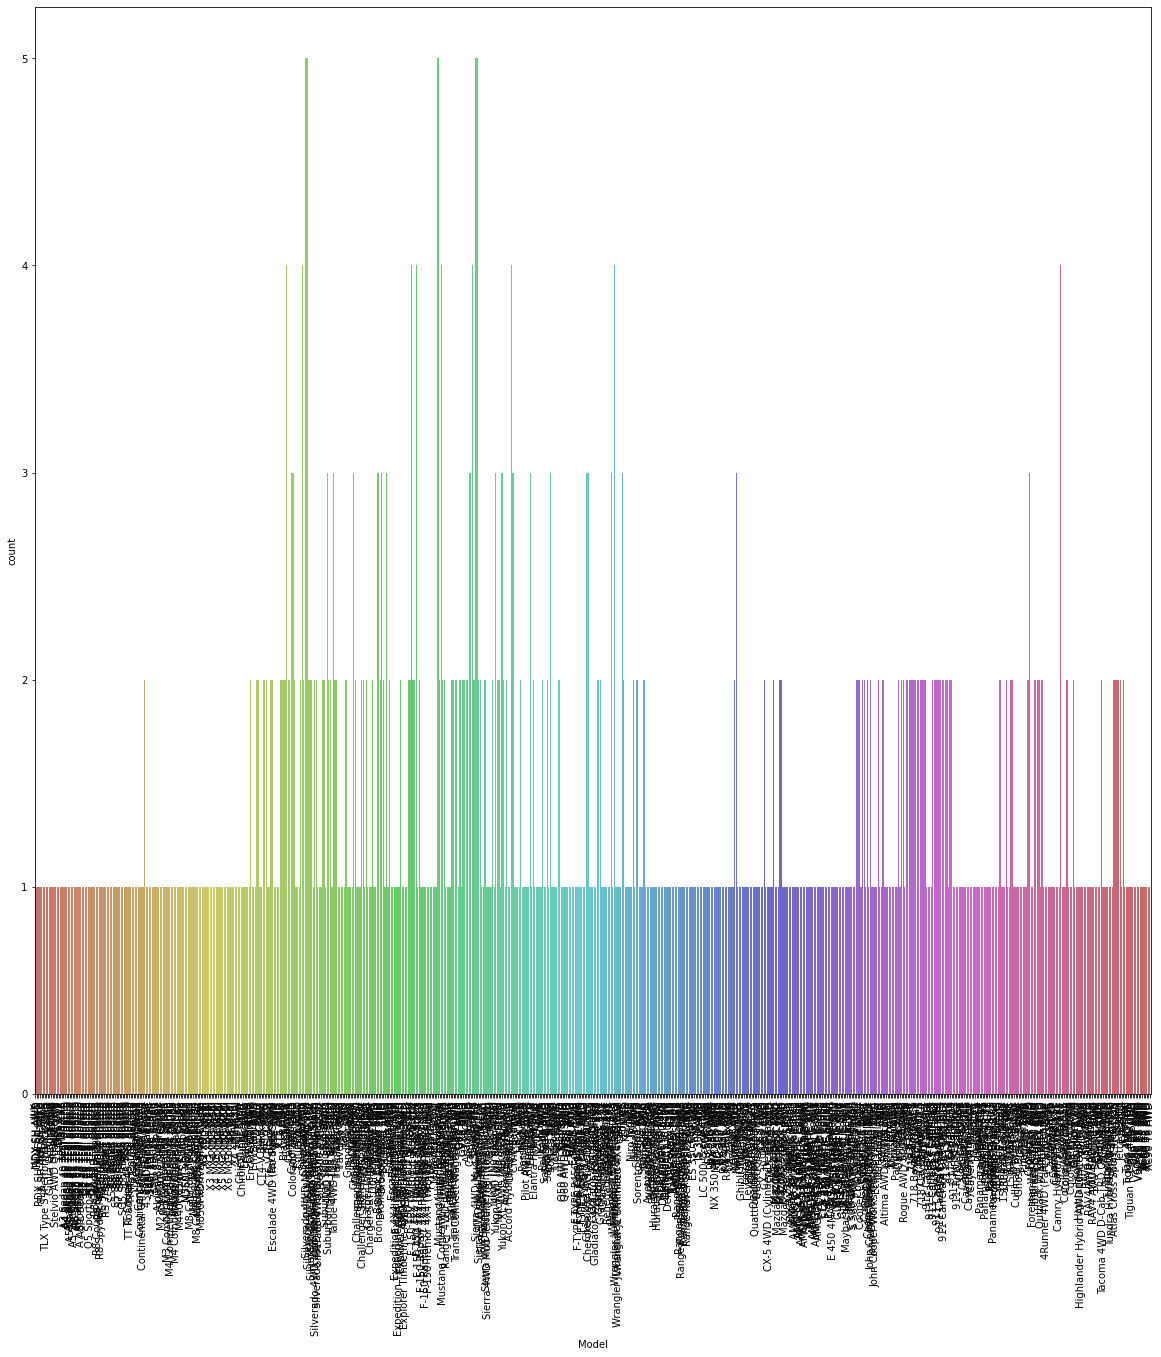

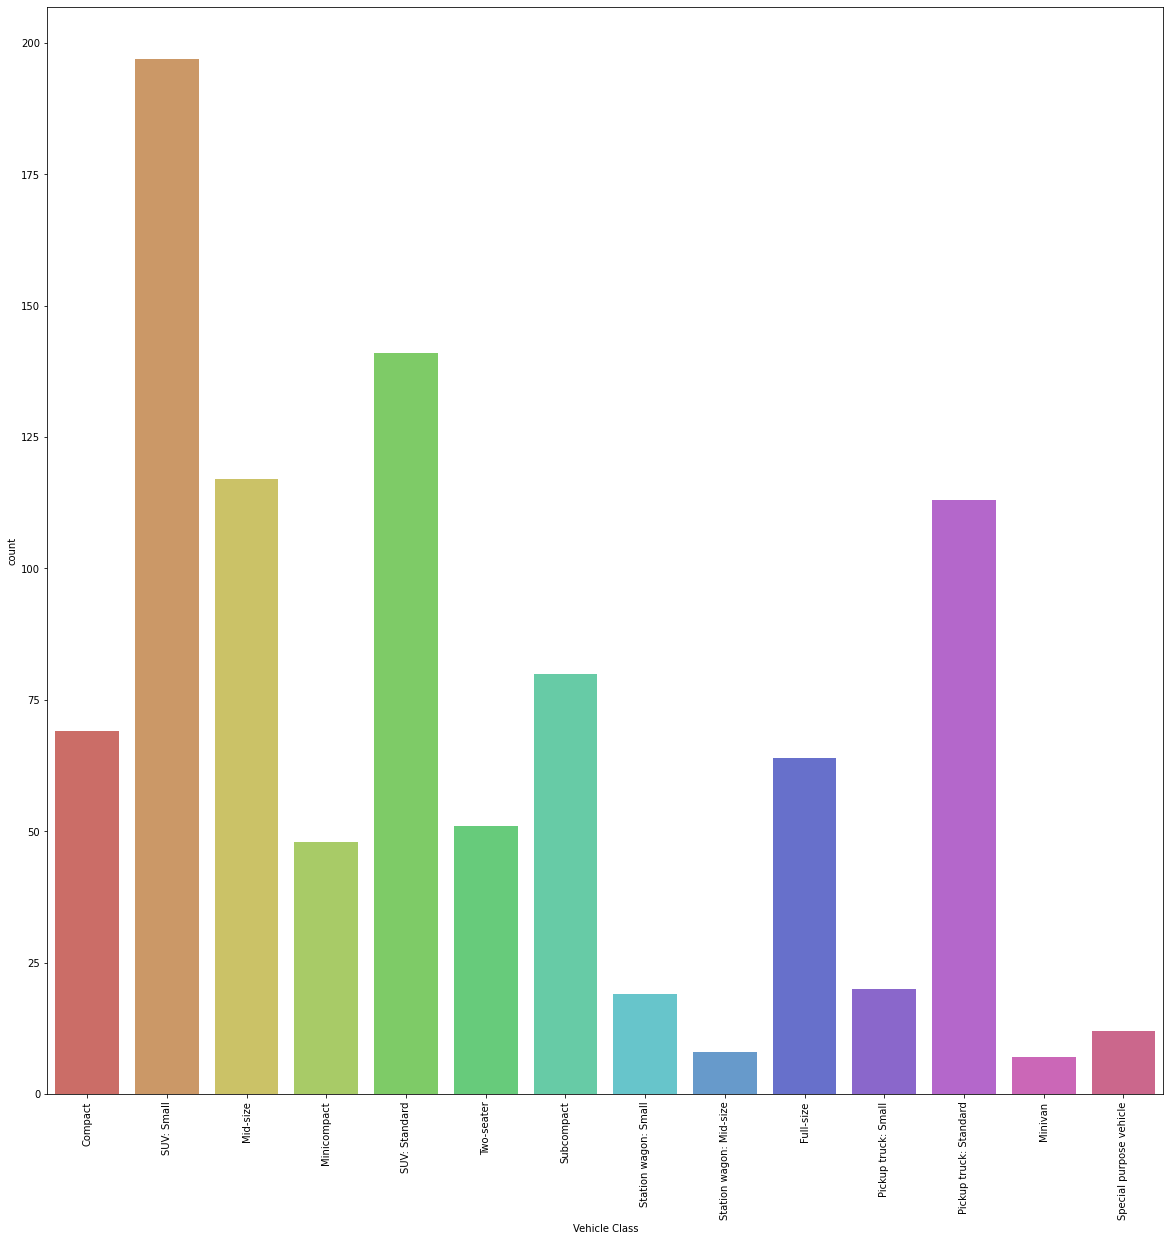

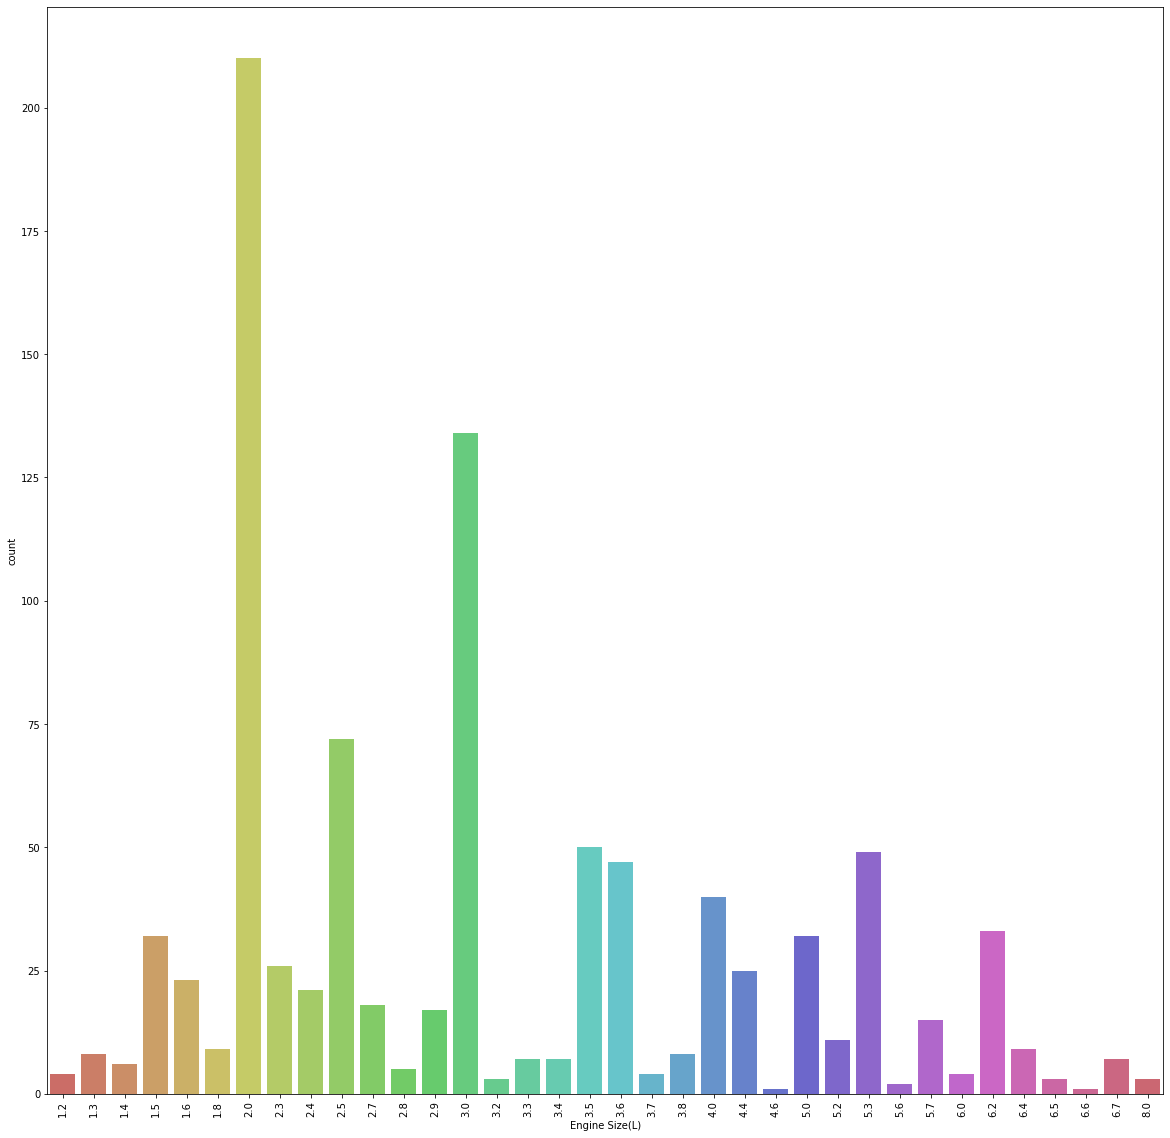

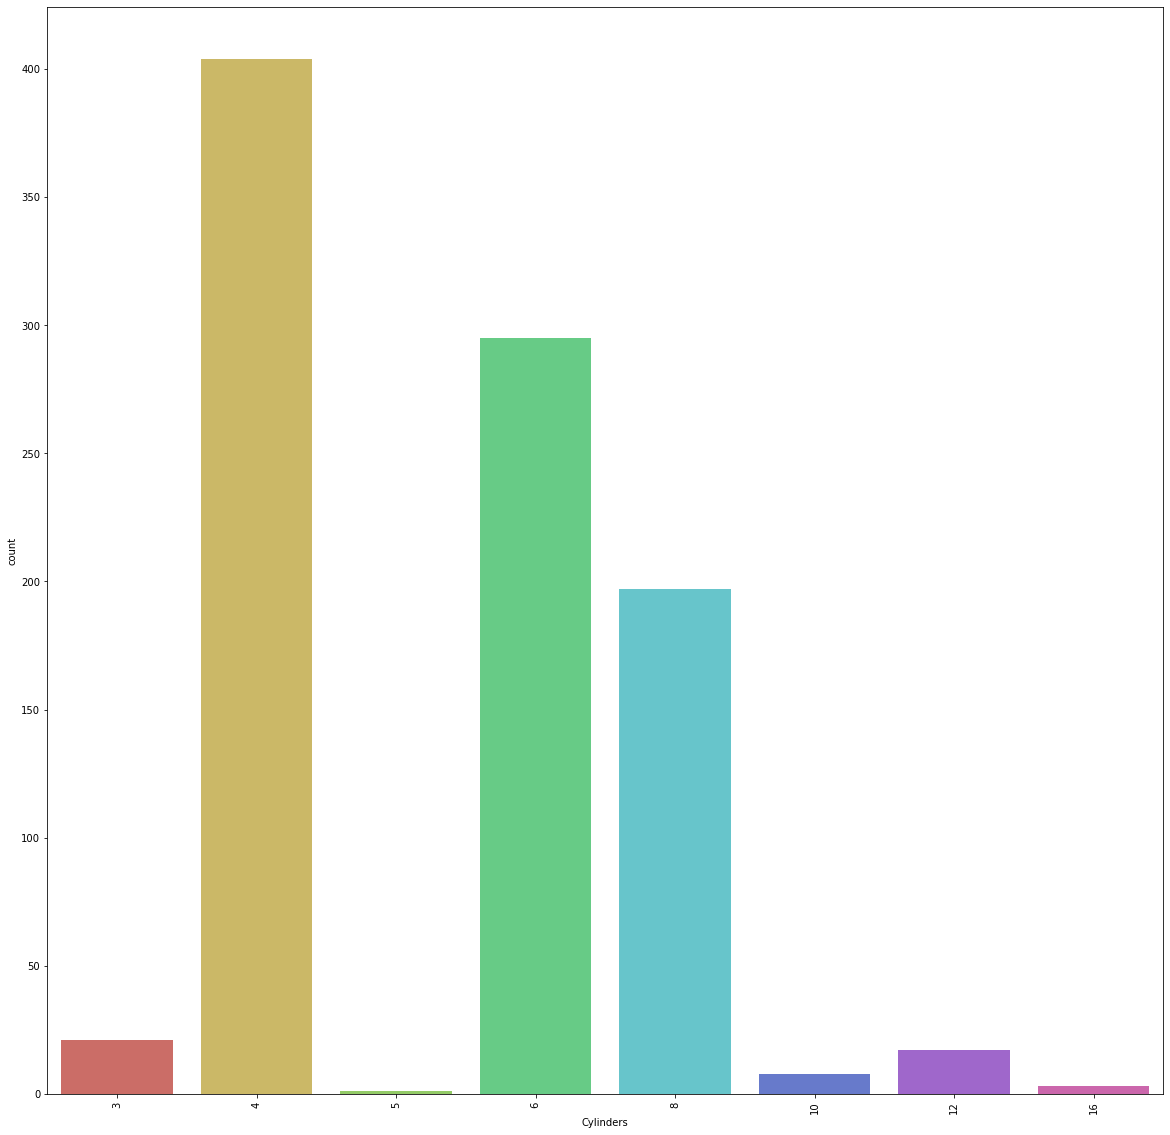

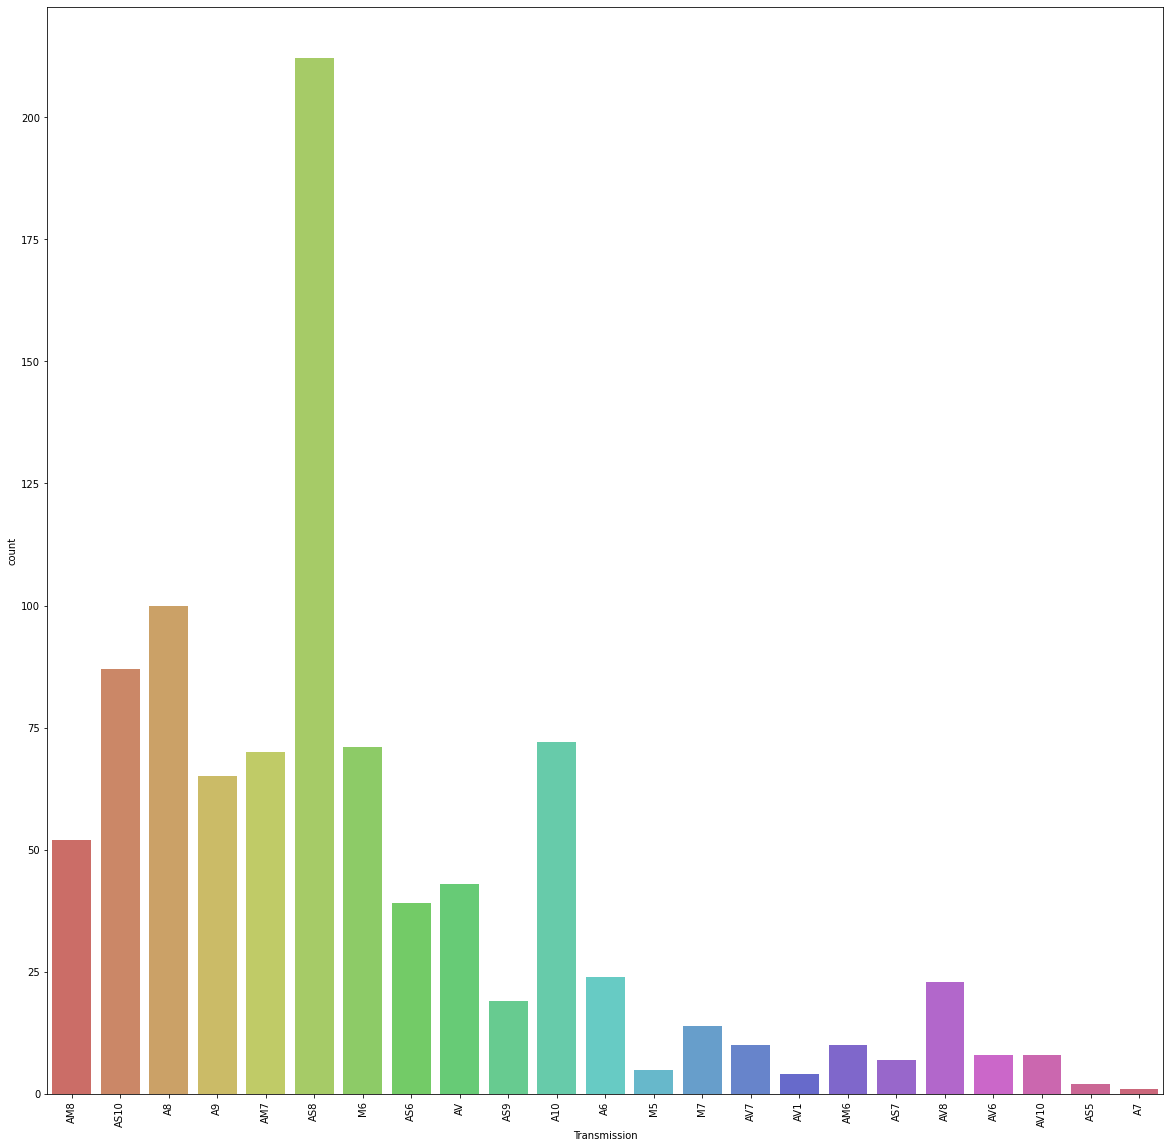

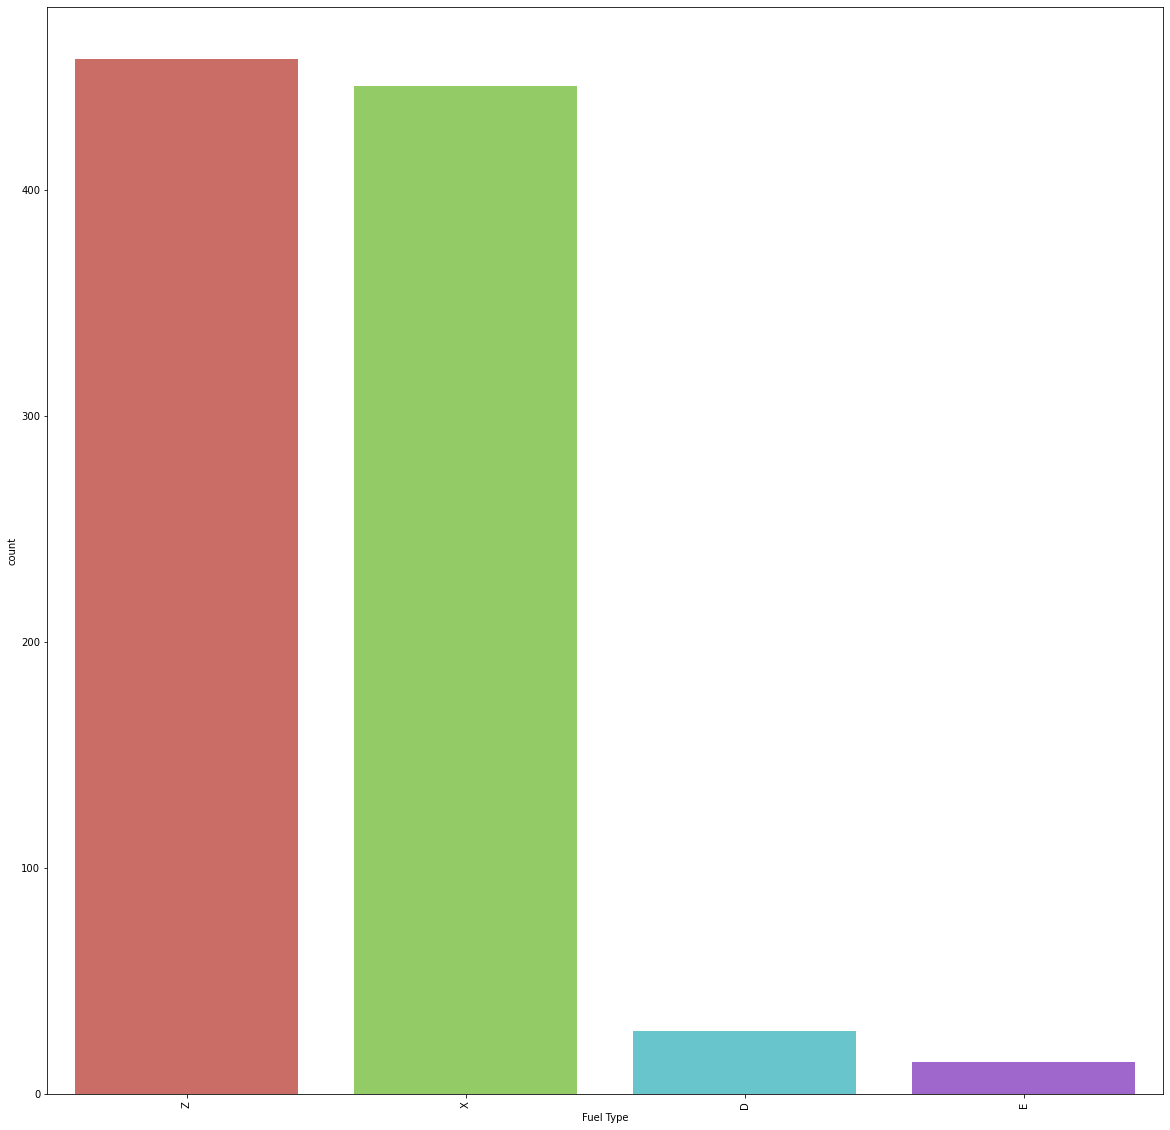

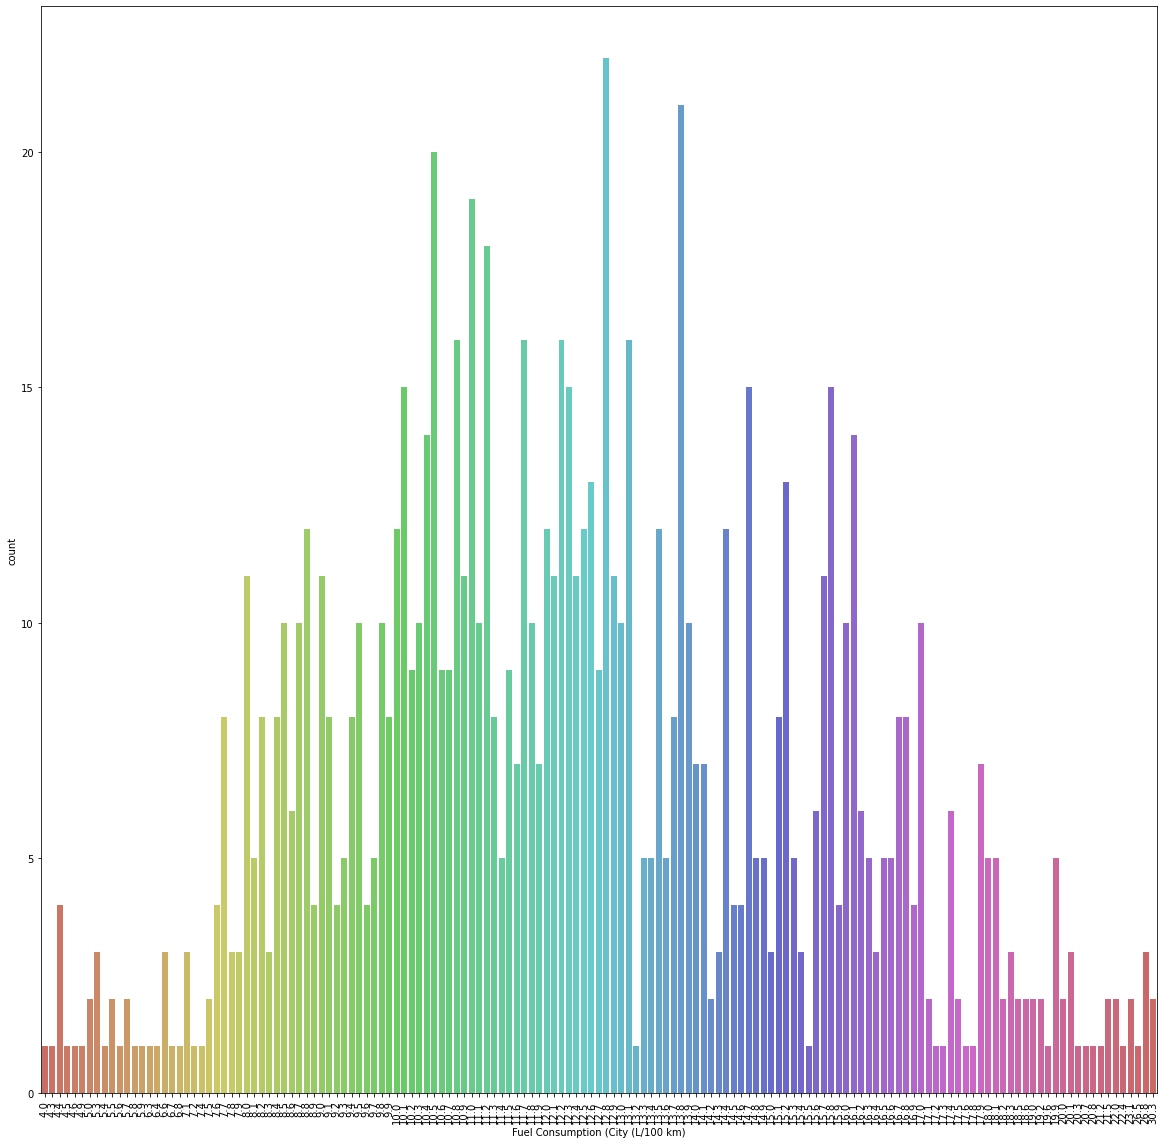

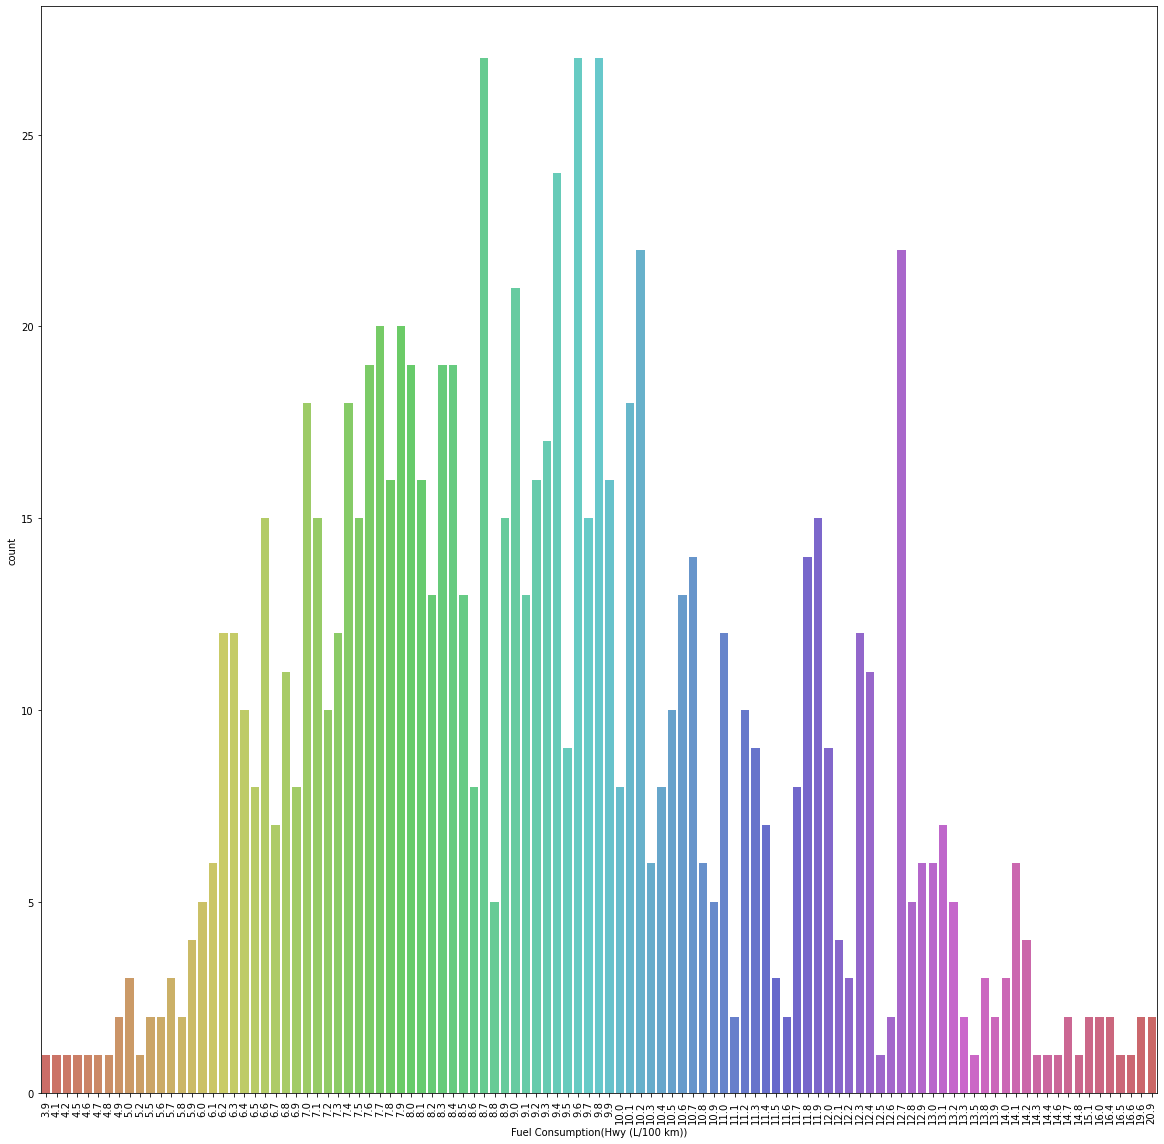

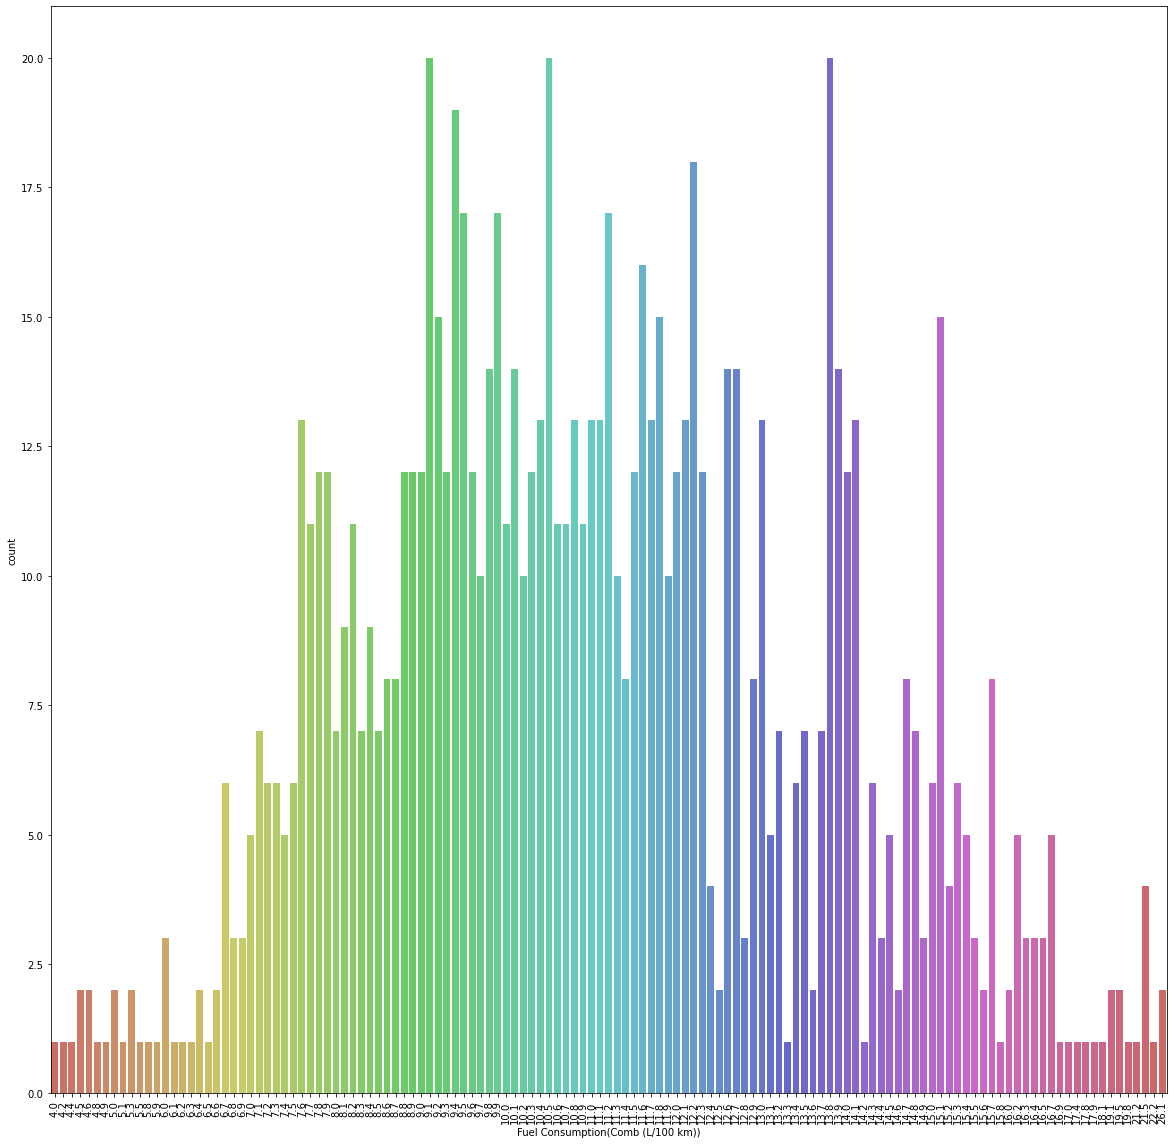

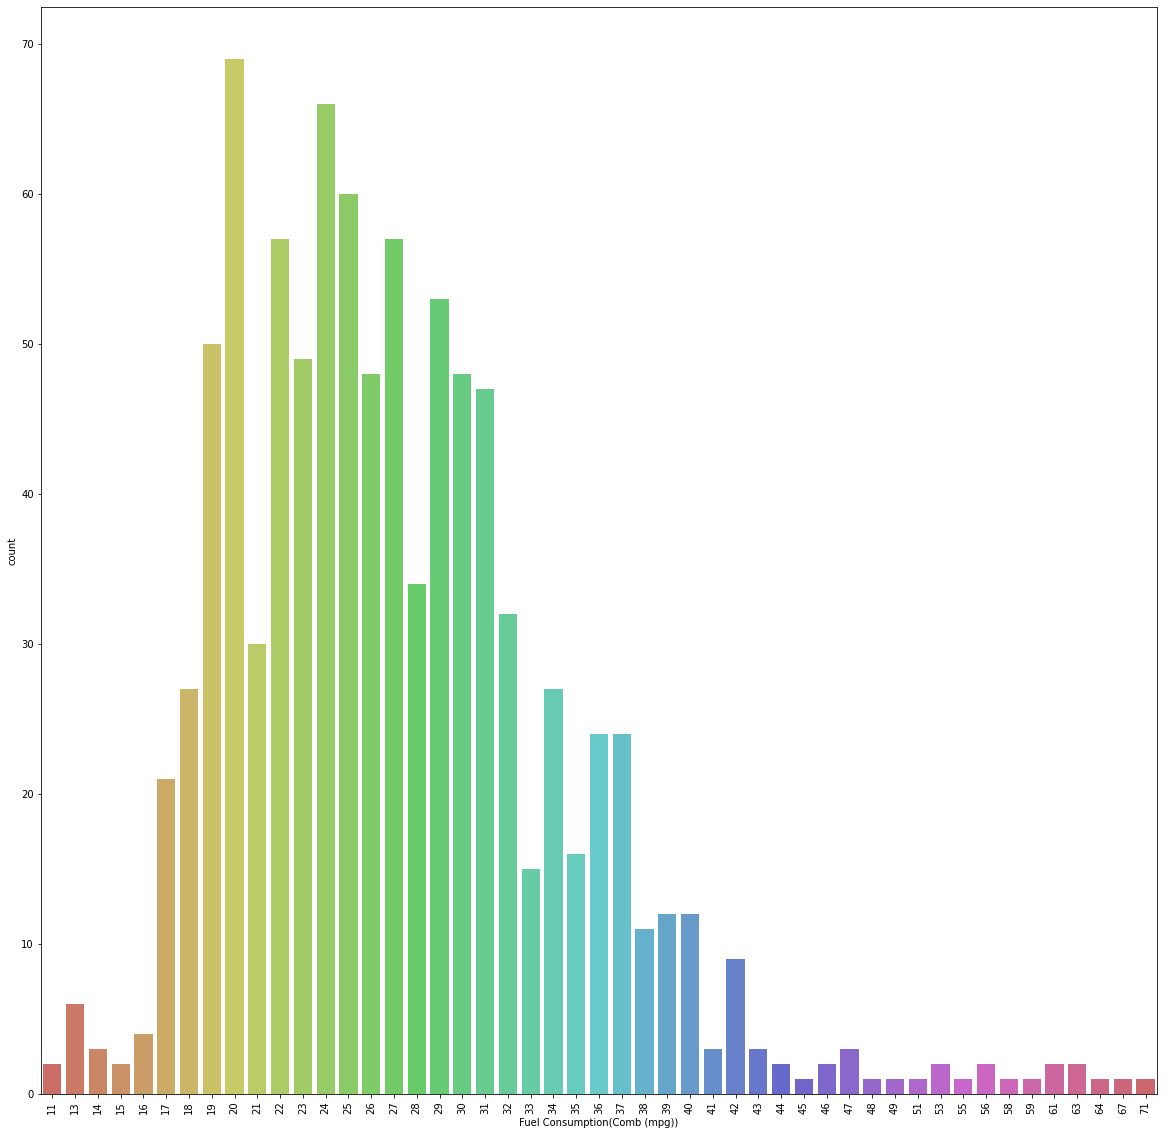

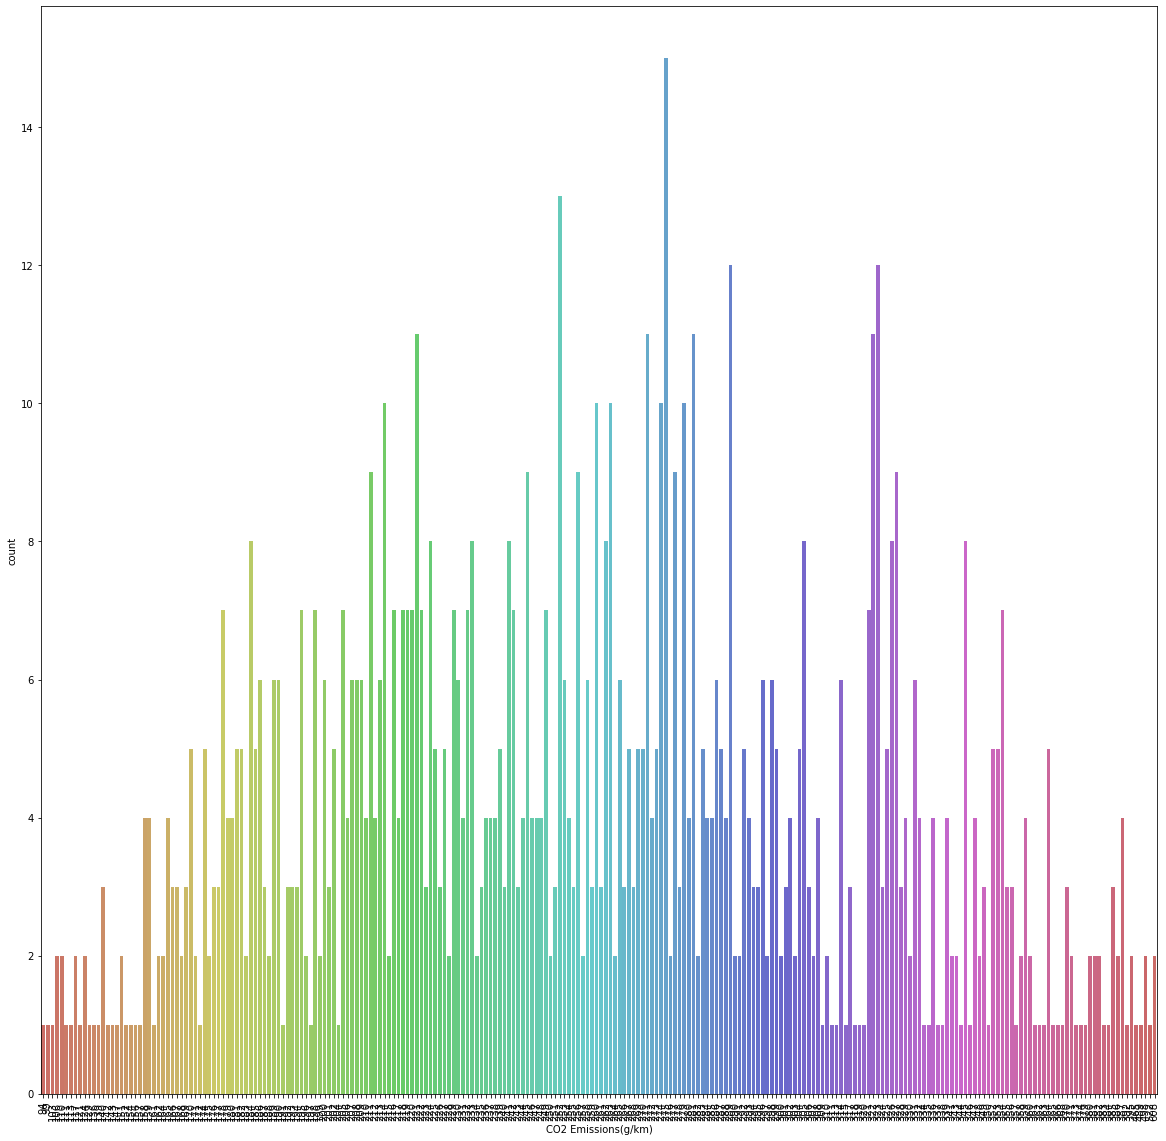

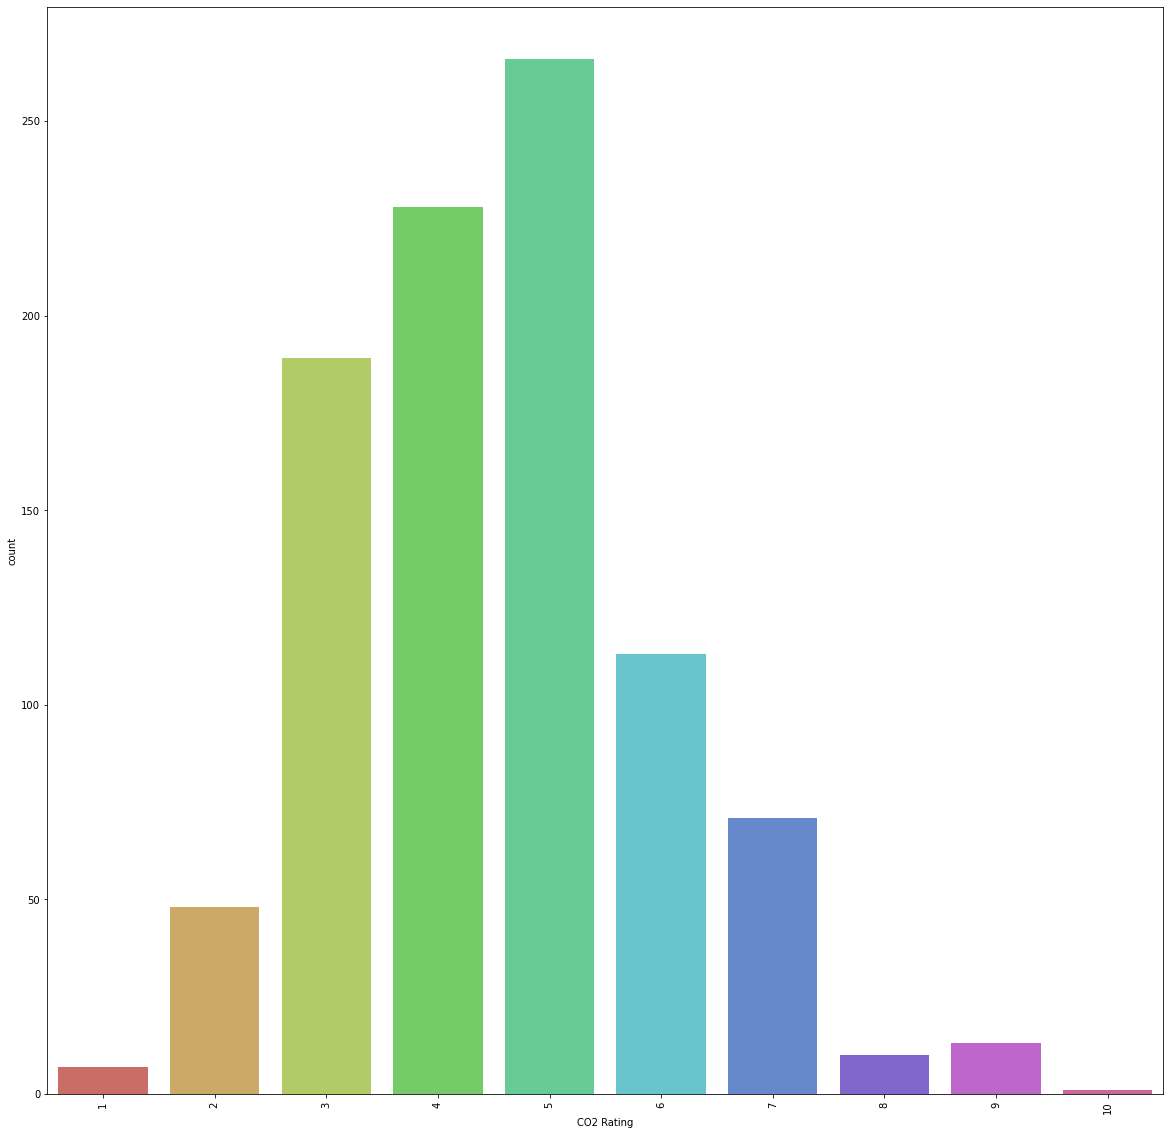

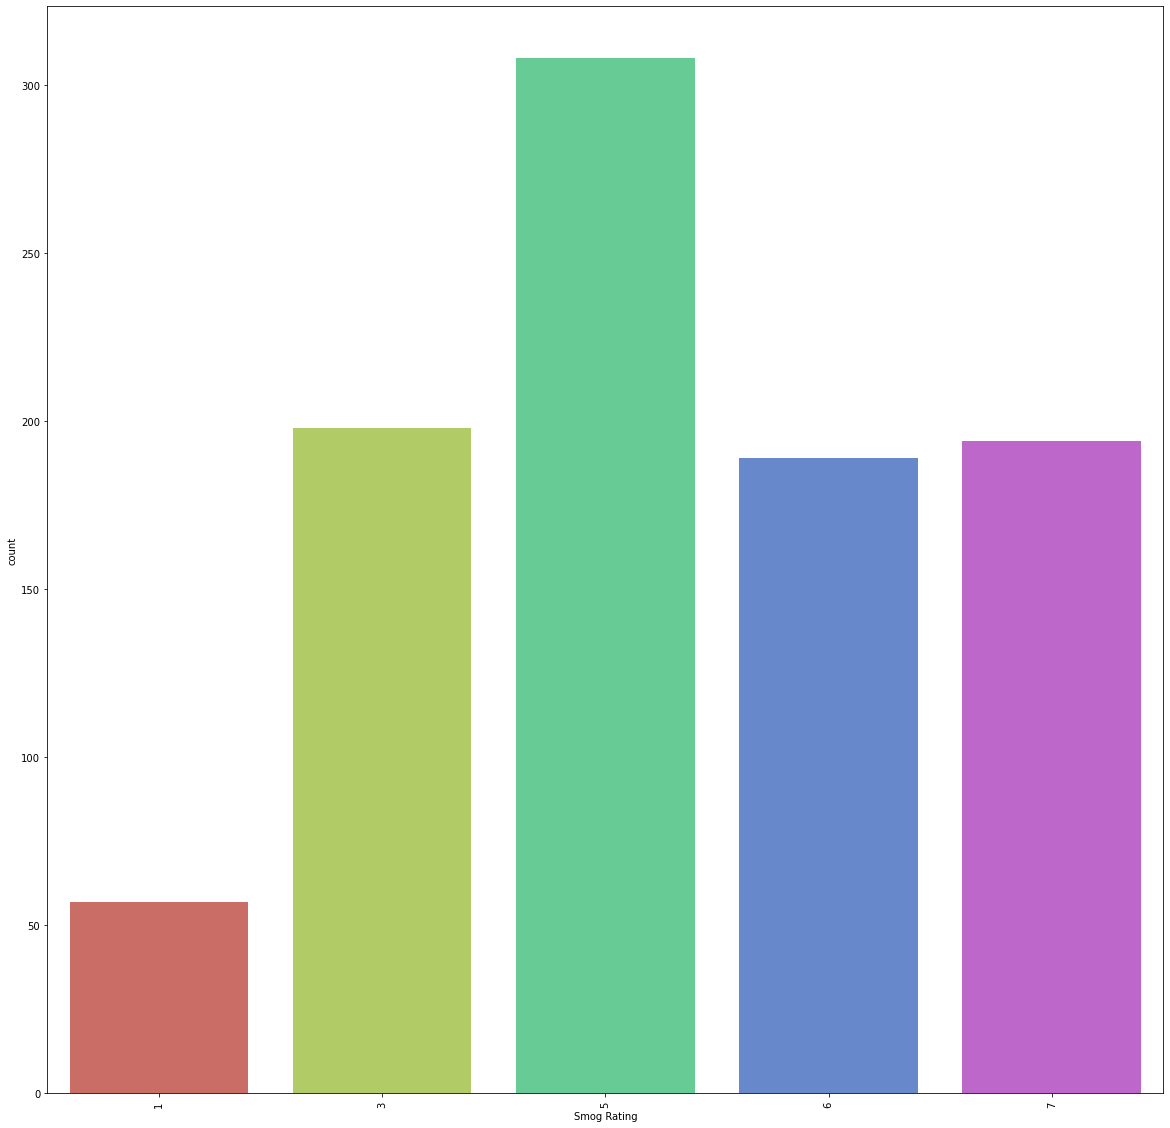

In [16]:
for i in data_cat.columns:
    plt.figure(figsize = (20,20))
    sns.countplot(data_cat[i], data = data_cat, palette = 'hls')
    plt.xticks(rotation = 90)
    

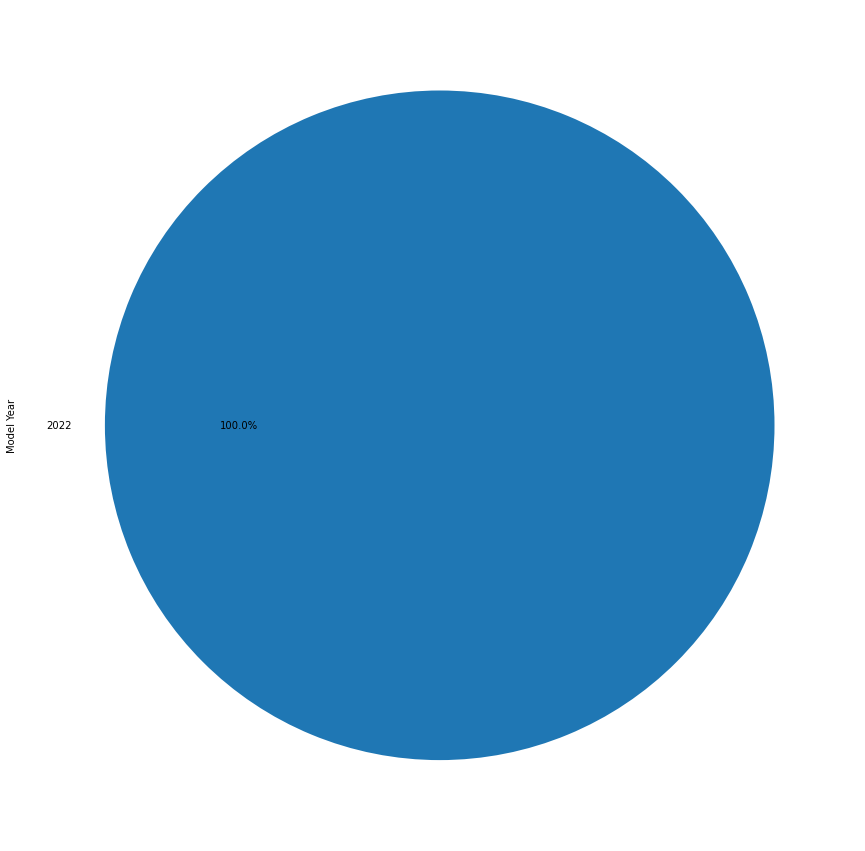

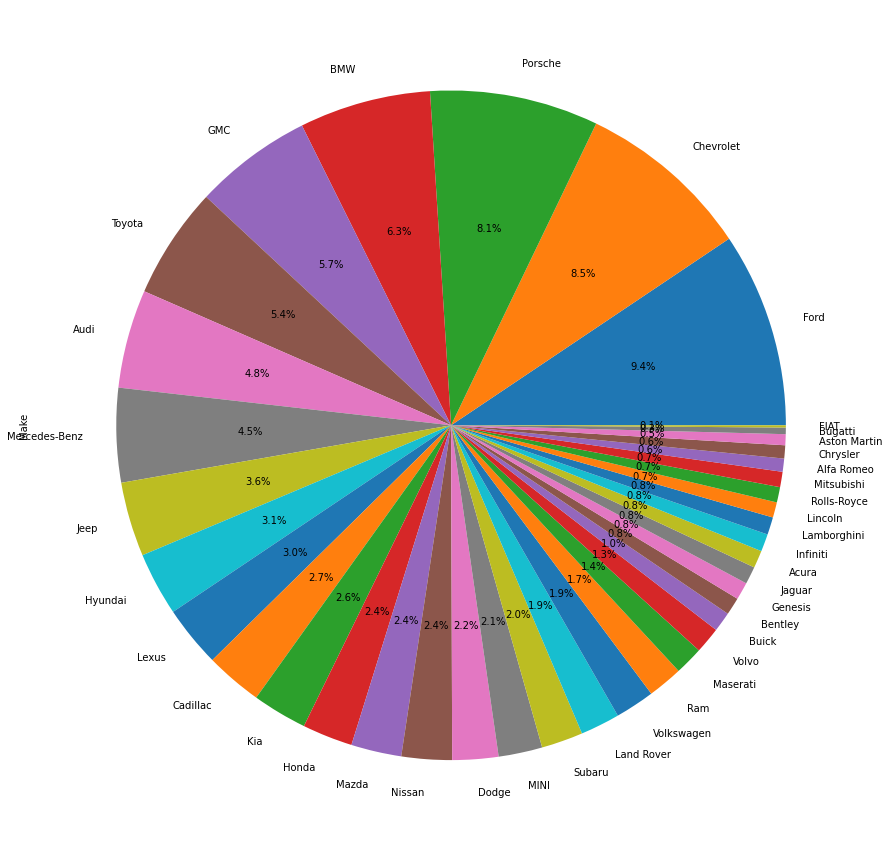

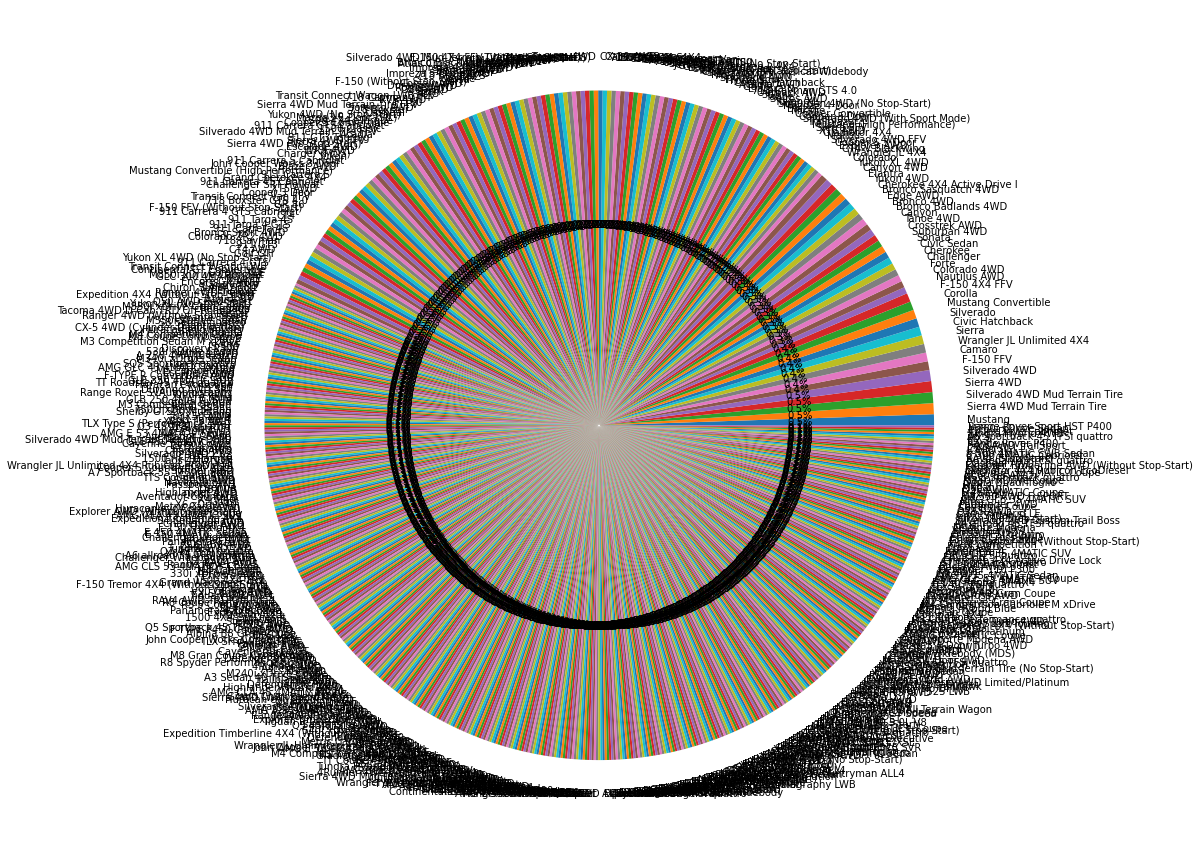

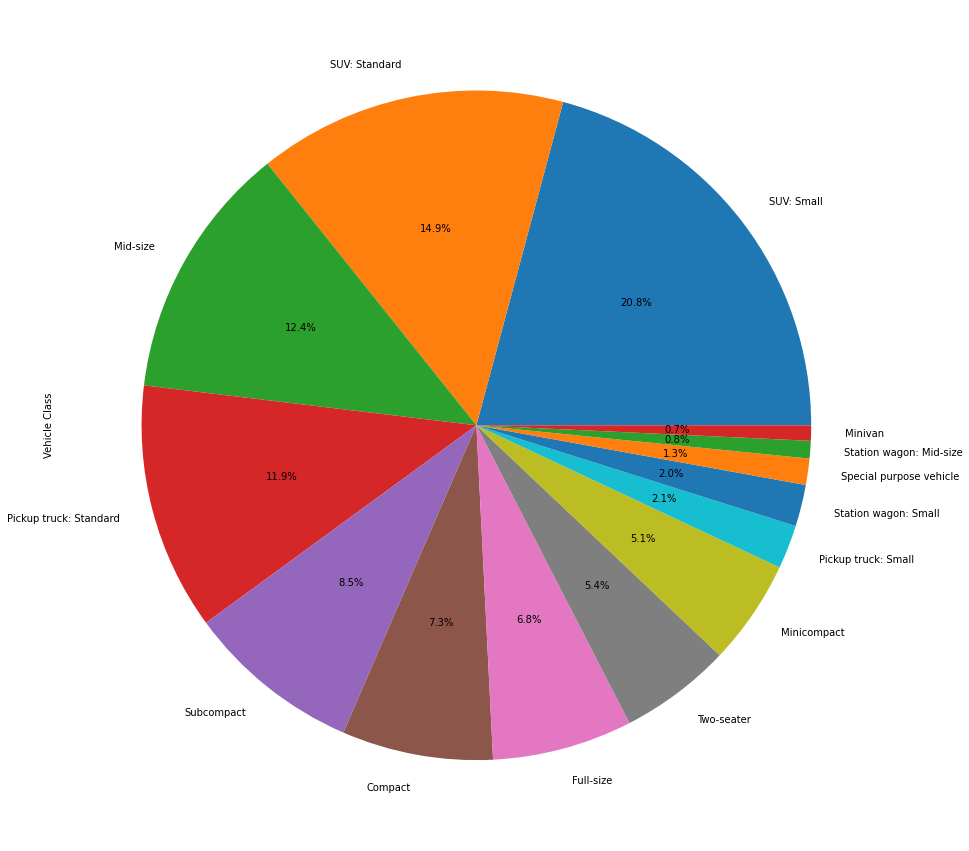

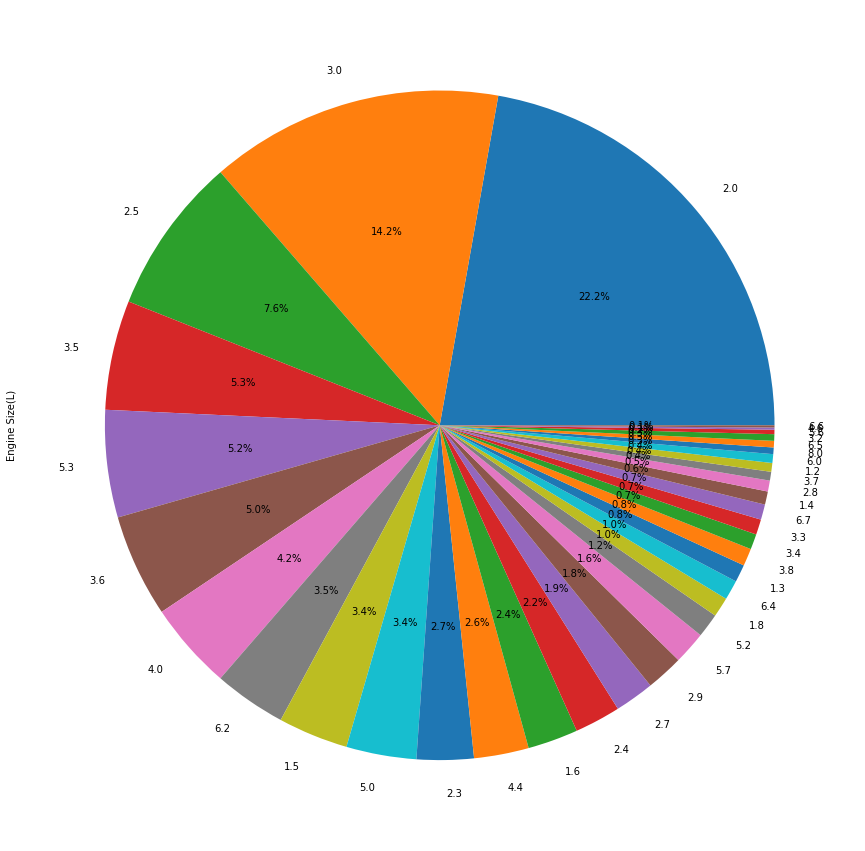

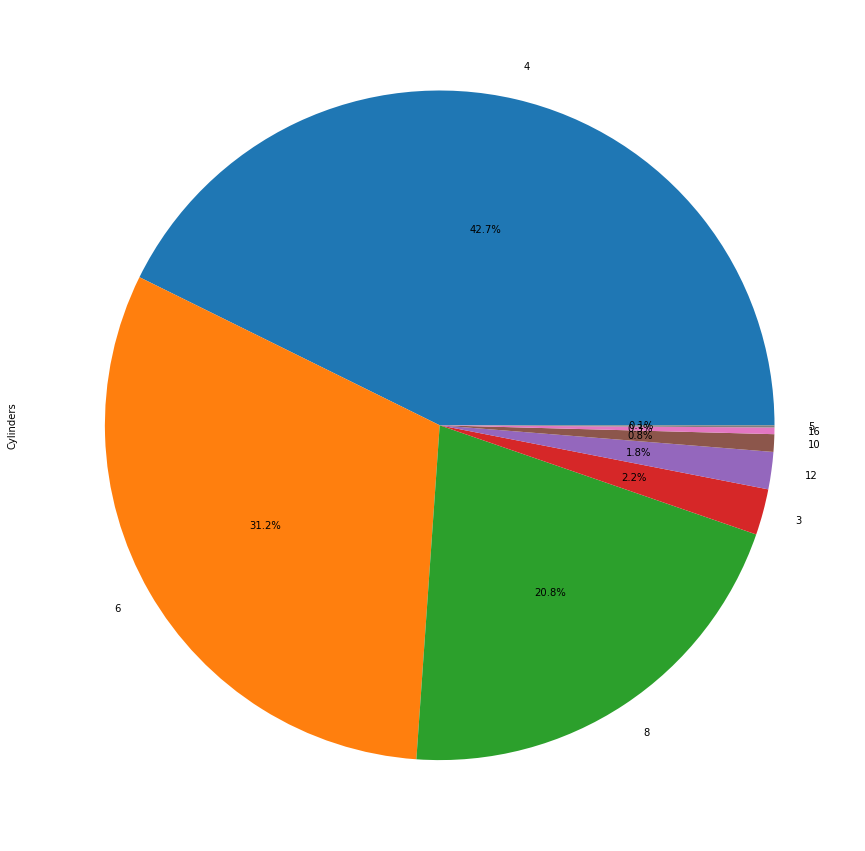

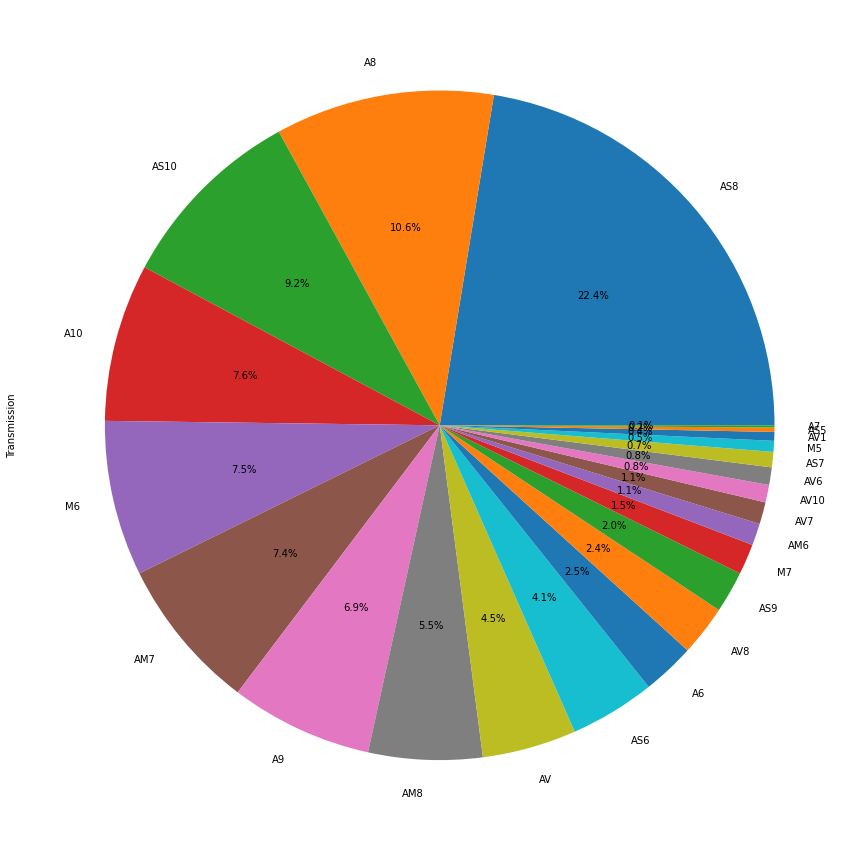

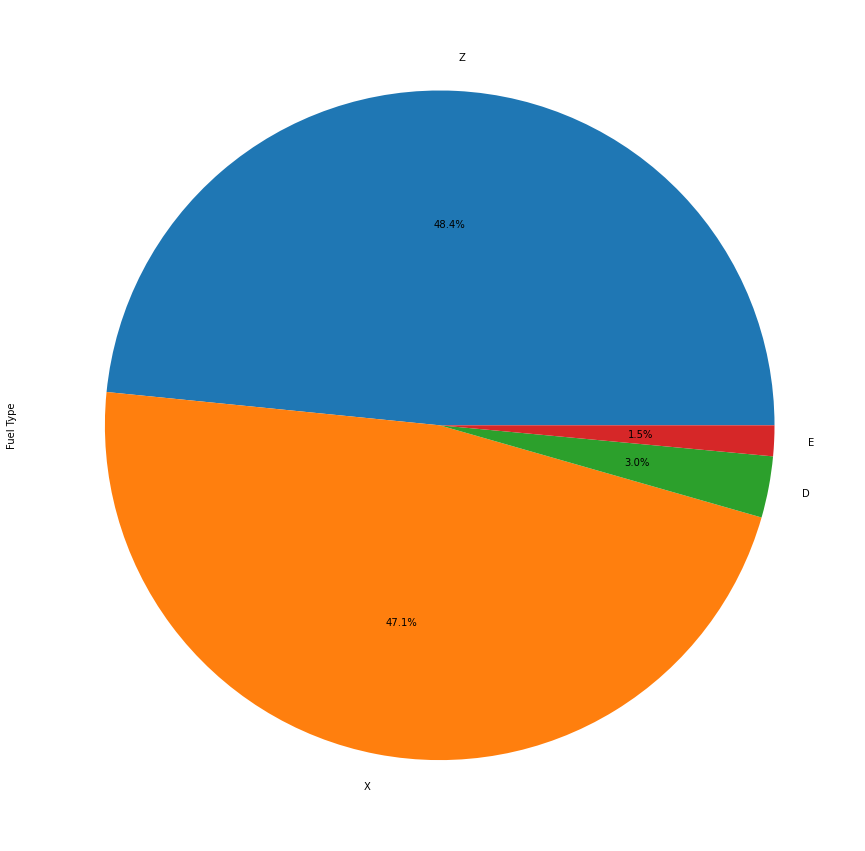

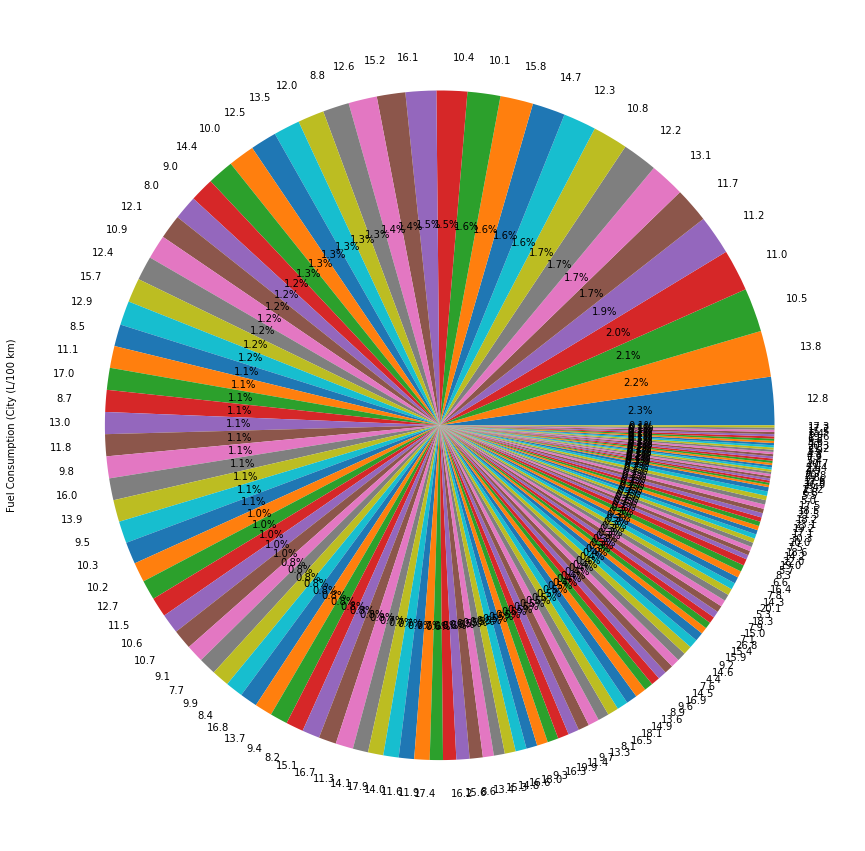

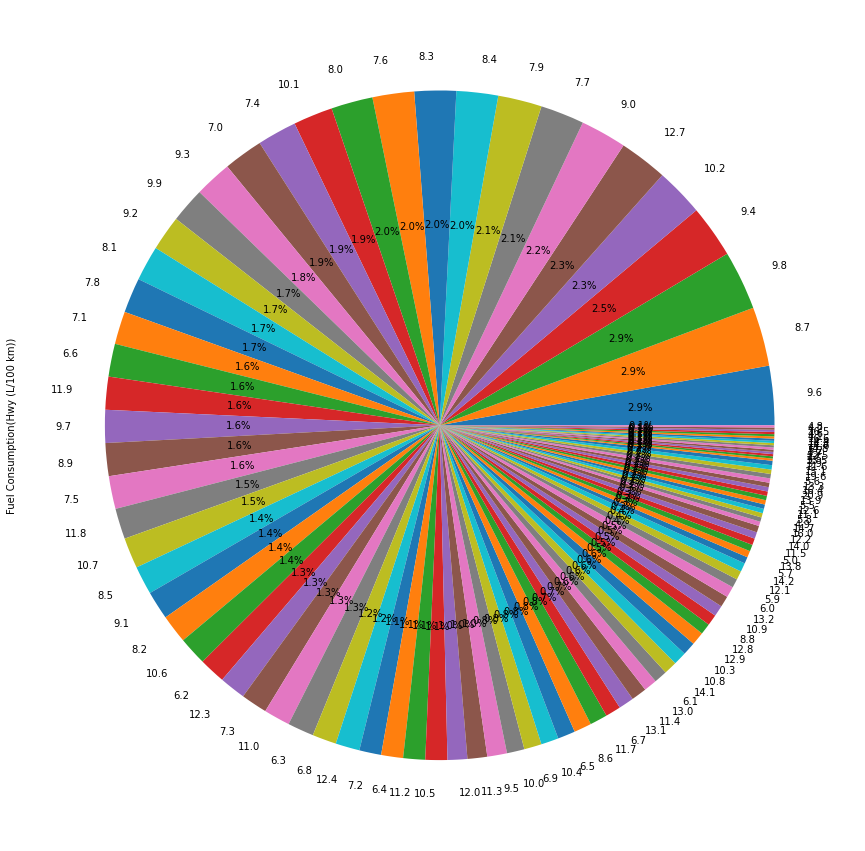

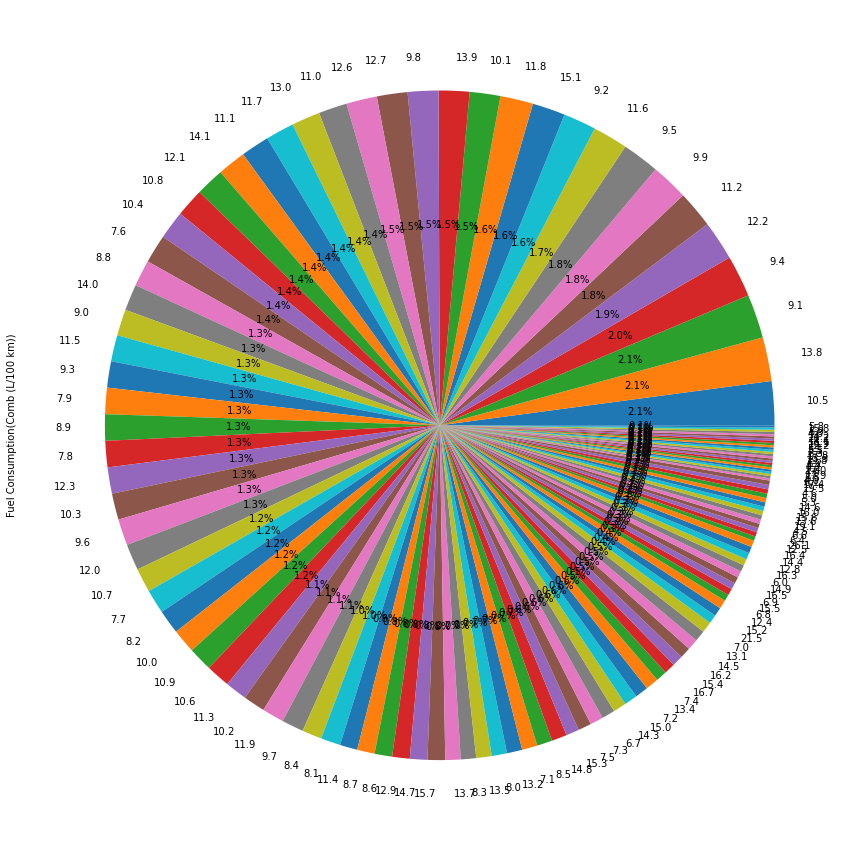

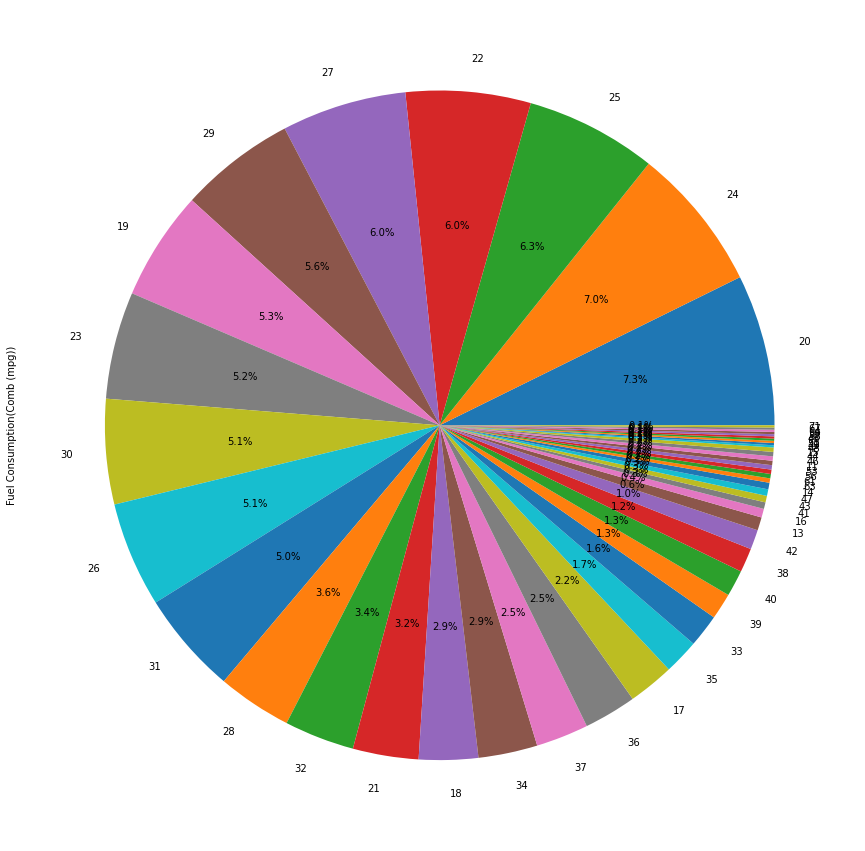

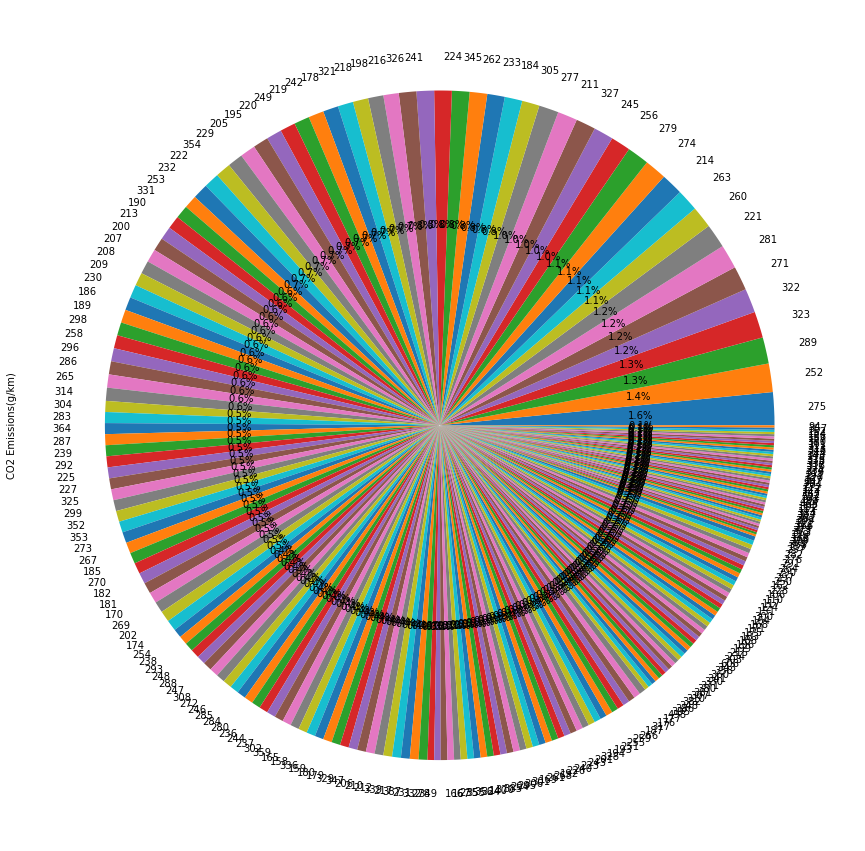

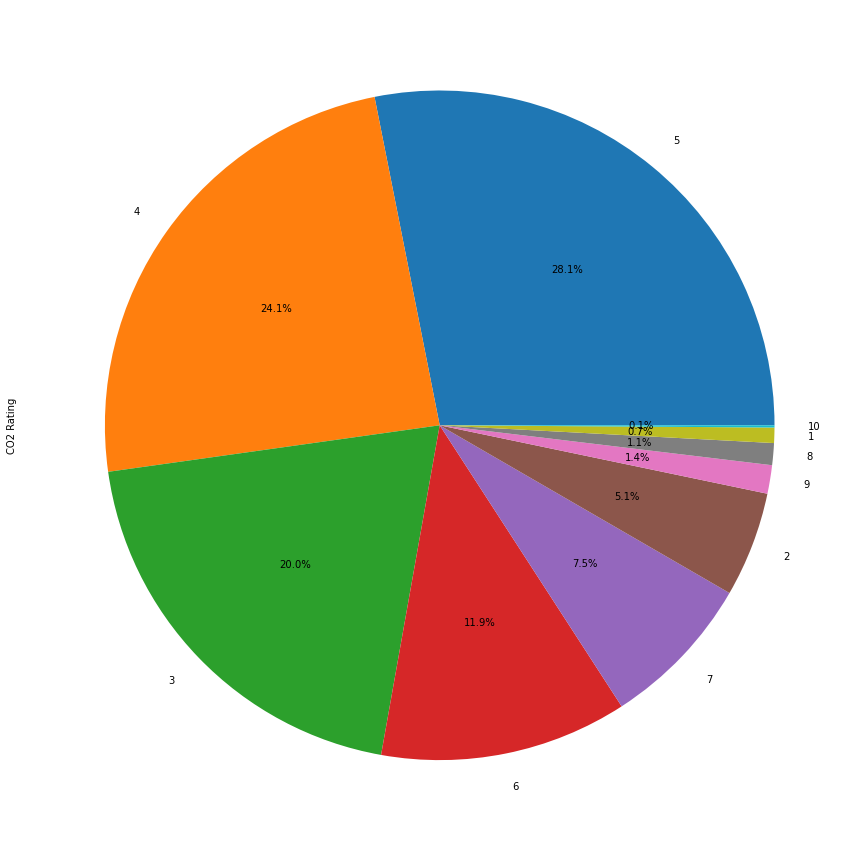

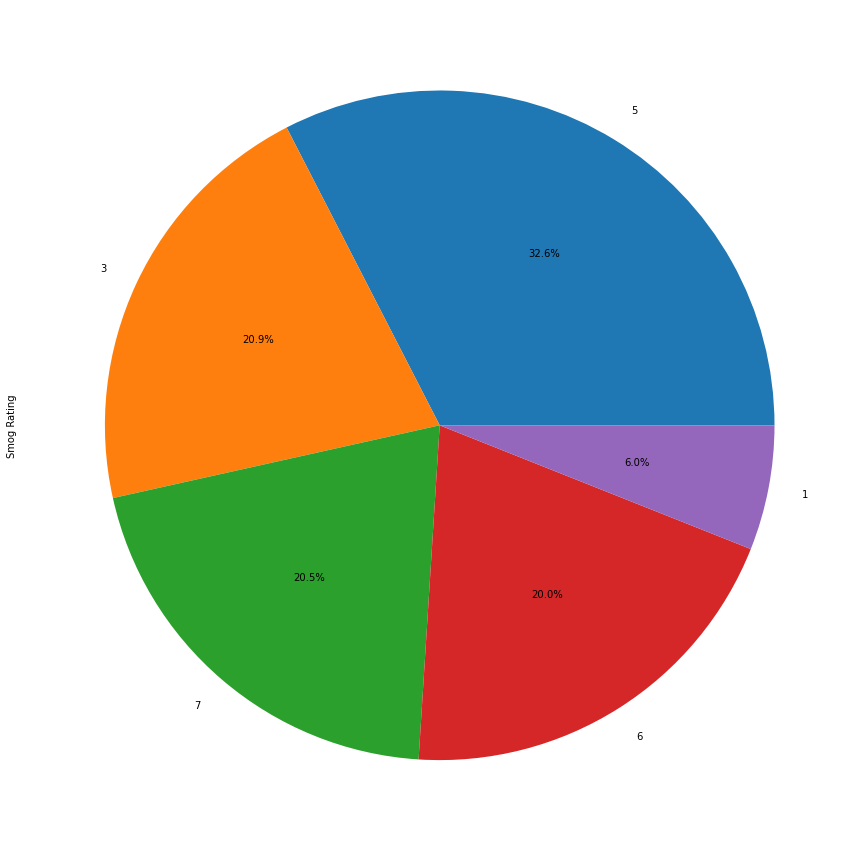

In [30]:
for i in data_cat.columns:
    plt.figure(figsize = (15,16))
    data_cat[i].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
    plt.xticks(rotation = 90)
    


In [32]:
from sklearn.model_selection import train_test_split

In [35]:
y = df['Smog Rating']
X = df.drop(['Smog Rating'], axis = 1)

In [132]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,train_size=0.8 ,random_state=1)

In [133]:
low_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique()<10 and X_train[cname].dtype == 'object']

In [134]:
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [135]:
my_cols = low_cardinality_cols + numerical_cols
X_trainn = X_train[my_cols].copy()
X_testt = X_test[my_cols].copy()

In [136]:
X_trainn.head()

Fuel Type  Model Year  Engine Size(L)  Cylinders  \
267         Z        2022             6.2          8   
843         Z        2022             6.7         12   
868         X        2022             2.5          4   
716         X        2022             1.5          4   
223         Z        2022             6.2          8   

     Fuel Consumption (City (L/100 km)  Fuel Consumption(Hwy (L/100 km))  \
267                               18.1                              11.4   
843                               19.9                              12.7   
868                                8.5                               6.1   
716                                9.6                               8.9   
223                               18.2                              14.2   

     Fuel Consumption(Comb (L/100 km))  Fuel Consumption(Comb (mpg))  \
267                               15.1                            19   
843                               16.7                            17   
868                                7.4                            38   
716                                9.3                            30   
223                               16.4                            17   

     CO2 Emissions(g/km)  CO2 Rating  
267                  352           3  
843                  387           2  
868                  174           7  
716                  216           5  
223                  385           2

In [137]:
s = (X_trainn.dtypes == 'object')
object_cols = list(s[s].index)

print('Categorical variables')
print(object_cols)

Categorical variables
['Fuel Type']


In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [139]:
def score_dataset(X_trainn, X_testt, y_train, y_test):
    model = RandomForestRegressor(n_estimators=100,random_state=0)
    model.fit(X_trainn, y_train)
    preds = model.predict(X_testt)
    return mean_absolute_error(y_test, preds)

In [140]:
from sklearn.preprocessing import OrdinalEncoder

In [141]:
label_X_train = X_trainn.copy()
label_X_test = X_testt.copy()

In [142]:
ordinal_encoder = OrdinalEncoder()


In [143]:
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_trainn[object_cols])
label_X_test[object_cols] = ordinal_encoder.fit_transform(X_testt[object_cols])

In [144]:
print('MAE is :',score_dataset(label_X_train,label_X_test,y_train,y_test))

MAE is : 0.6121973684210527


In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
log = LogisticRegression(max_iter= 4000)

In [147]:
log.fit(label_X_train,y_train)

LogisticRegression(max_iter=4000)

In [148]:
pred = log.predict(label_X_test)

In [149]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [150]:
print(confusion_matrix(y_test, pred))

[[ 3  6  1  0  0]
 [ 2 18 16  2  5]
 [ 0  5 41  2 11]
 [ 0  1 16 18  7]
 [ 0  0  8  0 28]]


In [151]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.60      0.30      0.40        10
           3       0.60      0.42      0.49        43
           5       0.50      0.69      0.58        59
           6       0.82      0.43      0.56        42
           7       0.55      0.78      0.64        36

    accuracy                           0.57       190
   macro avg       0.61      0.52      0.54       190
weighted avg       0.61      0.57      0.56       190



In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
dt = DecisionTreeClassifier(random_state=0)

In [155]:
dt.fit(label_X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [156]:
pred = dt.predict(label_X_test)

In [157]:
print(confusion_matrix(y_test, pred))

[[ 7  3  0  0  0]
 [ 2 30  6  1  4]
 [ 0 12 32  7  8]
 [ 0  3  9 21  9]
 [ 0  0  4  3 29]]


In [158]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.78      0.70      0.74        10
           3       0.62      0.70      0.66        43
           5       0.63      0.54      0.58        59
           6       0.66      0.50      0.57        42
           7       0.58      0.81      0.67        36

    accuracy                           0.63       190
   macro avg       0.65      0.65      0.64       190
weighted avg       0.63      0.63      0.62       190



In [162]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(label_X_train, y_train)

RandomForestClassifier()

In [163]:
pred = rfc.predict(label_X_test)

In [164]:
print(confusion_matrix(y_test, pred))

[[ 8  2  0  0  0]
 [ 1 29  9  1  3]
 [ 0 10 32  9  8]
 [ 0  2  7 25  8]
 [ 0  0  2  3 31]]


In [165]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.89      0.80      0.84        10
           3       0.67      0.67      0.67        43
           5       0.64      0.54      0.59        59
           6       0.66      0.60      0.62        42
           7       0.62      0.86      0.72        36

    accuracy                           0.66       190
   macro avg       0.70      0.69      0.69       190
weighted avg       0.66      0.66      0.65       190

